#SHAP(SHapley Additive exPlanations):

## Abstract

Counter-Strike: Global Offensive (CS:GO) is a multiplayer tactical first-person shooter developed by Valve and Hidden Path Entertainment. Counter-Strike: Global Offensive is a tactical shooter that emphasizes teamwork, strategy, and gunplay. Winning a game requires extensive teamwork, as well as personal economy management.

CS:GO’s primary game mode for its casual and competitive queues is bomb defusal. Each round, a team of terrorists must take the bomb and plant it on one of two bomb sites. The team of counter-terrorists are tasked with stopping them from planting, or defusing the bomb after it’s planted. If the bomb explodes, or if the terrorists kill all the CTs, then they win the round. If the CTs kill all the terrorists before the bomb is planted, or defuse the bomb after its planted, then they win. A CT can defuse the bomb even if other terrorists are still alive. If the bomb isn’t planted and players from both sides are alive at the end of a round, the CTs win that round.

At the beginning of the round, each player has to buy their equipment, consisting of weapons, armor, and grenades. There are five categories of purchasable weaponry: rifles, submachine guns, "heavy" weaponry (light machine guns and shotguns), pistols, and grenades. Players can choose between full or half armor, a handful of grenades, and several weapons. Players will earn money each round, and can earn additional money for killing players and fulfilling objectives like planting or defusing the bomb.

It can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction.

Python command to install the SHAP package, which is a popular Python library for interpreting and explaining machine learning models.

## Installing all the required packages

In [1]:
!pip install shap
#Installing SHAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.3 MB/s eta 0:00:00


## Importing all the libararies required

 import and from are used to include external code libraries or modules in a program.

In [2]:
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
from matplotlib.pyplot import figure
from math import ceil
import torch
import shap
from torch import nn
import torch.nn.functional as F
from torch import optim
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline
from sklearn.pipeline import Pipeline
%config InlineBackend.figure_format = 'retina'
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
sns.set(rc={"figure.figsize": (16, 8)})

pd.set_option('max_colwidth', 400)

## Exploratory Data Analysis (EDA)

### Reading the Dataset and understanding

In [3]:
#Importing the Dataset.
data=pd.read_csv("https://raw.githubusercontent.com/7srik/Auto_ML_CSGO_Round_Winner/main/csgo_round_snapshots.csv")
datac=pd.read_csv("https://raw.githubusercontent.com/7srik/Auto_ML_CSGO_Round_Winner/main/csgo_round_snapshots.csv")

data.head() is used to display the first few rows of a pandas DataFrame called data.

In [4]:
data.name = "data"
data.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00         0        0  de_dust2         False        500       500   
1     156.03         0        0  de_dust2         False        500       500   
2      96.03         0        0  de_dust2         False        391       400   
3      76.03         0        0  de_dust2         False        391       400   
4     174.97         1        0  de_dust2         False        500       500   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0         0        0      4000  ...                    0   
1       400      300       600  ...                    0   
2       294      200       750  ...                    0   
3       294      200       750  ...                    0   
4       192        0     18350  ...                    0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                        0                       0   
1                        0                       2   
2                        0                       2   
3                        0                       0   
4                        0                       0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                        0                       0            CT  
1                        0                       0            CT  
2                        0                       0            CT  
3                        0                       0            CT  
4                        0                       0            CT  

[5 rows x 97 columns]

In [5]:
#Data types of the columns present in the DataSet
data.dtypes

time_left                    float64
ct_score                       int64
t_score                        int64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade      int64
t_grenade_molotovgrenade       int64
ct_grenade_decoygrenade        int64
t_grenade_decoygrenade         int64
round_winner                  object
Length: 97, dtype: object

data.count() is used to count the number of non-null values in each column of a pandas DataFrame called data.

In [6]:
data.count()

time_left                    122410
ct_score                     122410
t_score                      122410
map                          122410
bomb_planted                 122410
                              ...  
ct_grenade_molotovgrenade    122410
t_grenade_molotovgrenade     122410
ct_grenade_decoygrenade      122410
t_grenade_decoygrenade       122410
round_winner                 122410
Length: 97, dtype: int64

In [7]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    117448
True       4962
dtype: int64


In [8]:
# We need to check missing values in dataset
data.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

### Changing the values of round_winner from CT or T to 0 or 1

This code creates a LabelEncoder object called "encoder", which is used to transform the values in the "round_winner" column of a Pandas dataframe called "data" into numerical labels. The second line applies the encoder to the "round_winner" column of the dataframe, replacing the original values with their corresponding numerical labels. The third line creates a dictionary called "winner_mappings" that maps each numerical label to its original string value, based on the classes identified by the encoder. This code is commonly used for preparing categorical data for machine learning models that require numerical inputs.

In [9]:
encoder = LabelEncoder()
data['round_winner'] = encoder.fit_transform(data['round_winner'])
winner_mappings = {index: label for index, label in enumerate(encoder.classes_)}

### Assigning each map an integer value

In [10]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mappings = {index: label for index, label in enumerate(encoder.classes_)}

### Changing the values of bomb_planted from False or True to 0 or 1

This code converts the data type of the "bomb_planted" column in a Pandas dataframe called "data" from its original data type to a 16-bit integer data type using the NumPy library. This type of conversion can be useful for reducing the memory usage of large datasets that contain numeric data, as 16-bit integers require less memory than the default data type used by Pandas, which is usually 32-bit or 64-bit integers.

In [11]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

## Removing target variable and unnecessary features

This code defines the target variable y as the "round_winner" column dataframe data, and the input variables x as all the columns in data except for the "round_winner" column and a set of specific columns that are being removed. These specific columns are the ones that are considered to contribute the least to predicting the target variable.

In [12]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
x=data
y=data['round_winner']
#removing features which are contributing the lowest to predict the output (or) target variable.
x=x.drop("t_weapon_scar20", axis=1)
x=x.drop("t_weapon_p90", axis=1)
x=x.drop("ct_weapon_p90", axis=1)
x=x.drop("t_weapon_xm1014", axis=1)
x=x.drop("t_weapon_nova", axis=1)
x=x.drop("t_weapon_bizon", axis=1)
x=x.drop("t_weapon_mag7", axis=1)
x=x.drop("t_weapon_negev", axis=1)
x=x.drop("t_weapon_r8revolver", axis=1)
x=x.drop("t_weapon_sawedoff", axis=1)
x=x.drop("ct_weapon_g3sg1", axis=1)
x=x.drop("t_weapon_m249", axis=1)
x=x.drop("ct_weapon_negev", axis=1)
x=x.drop("ct_weapon_bizon", axis=1)
x=x.drop("ct_weapon_sawedoff", axis=1)
x=x.drop("ct_weapon_r8revolver", axis=1)
x=x.drop("ct_weapon_m249", axis=1)
data=x
x=data.drop('round_winner', axis=1) # features

## Histogram of the dataset

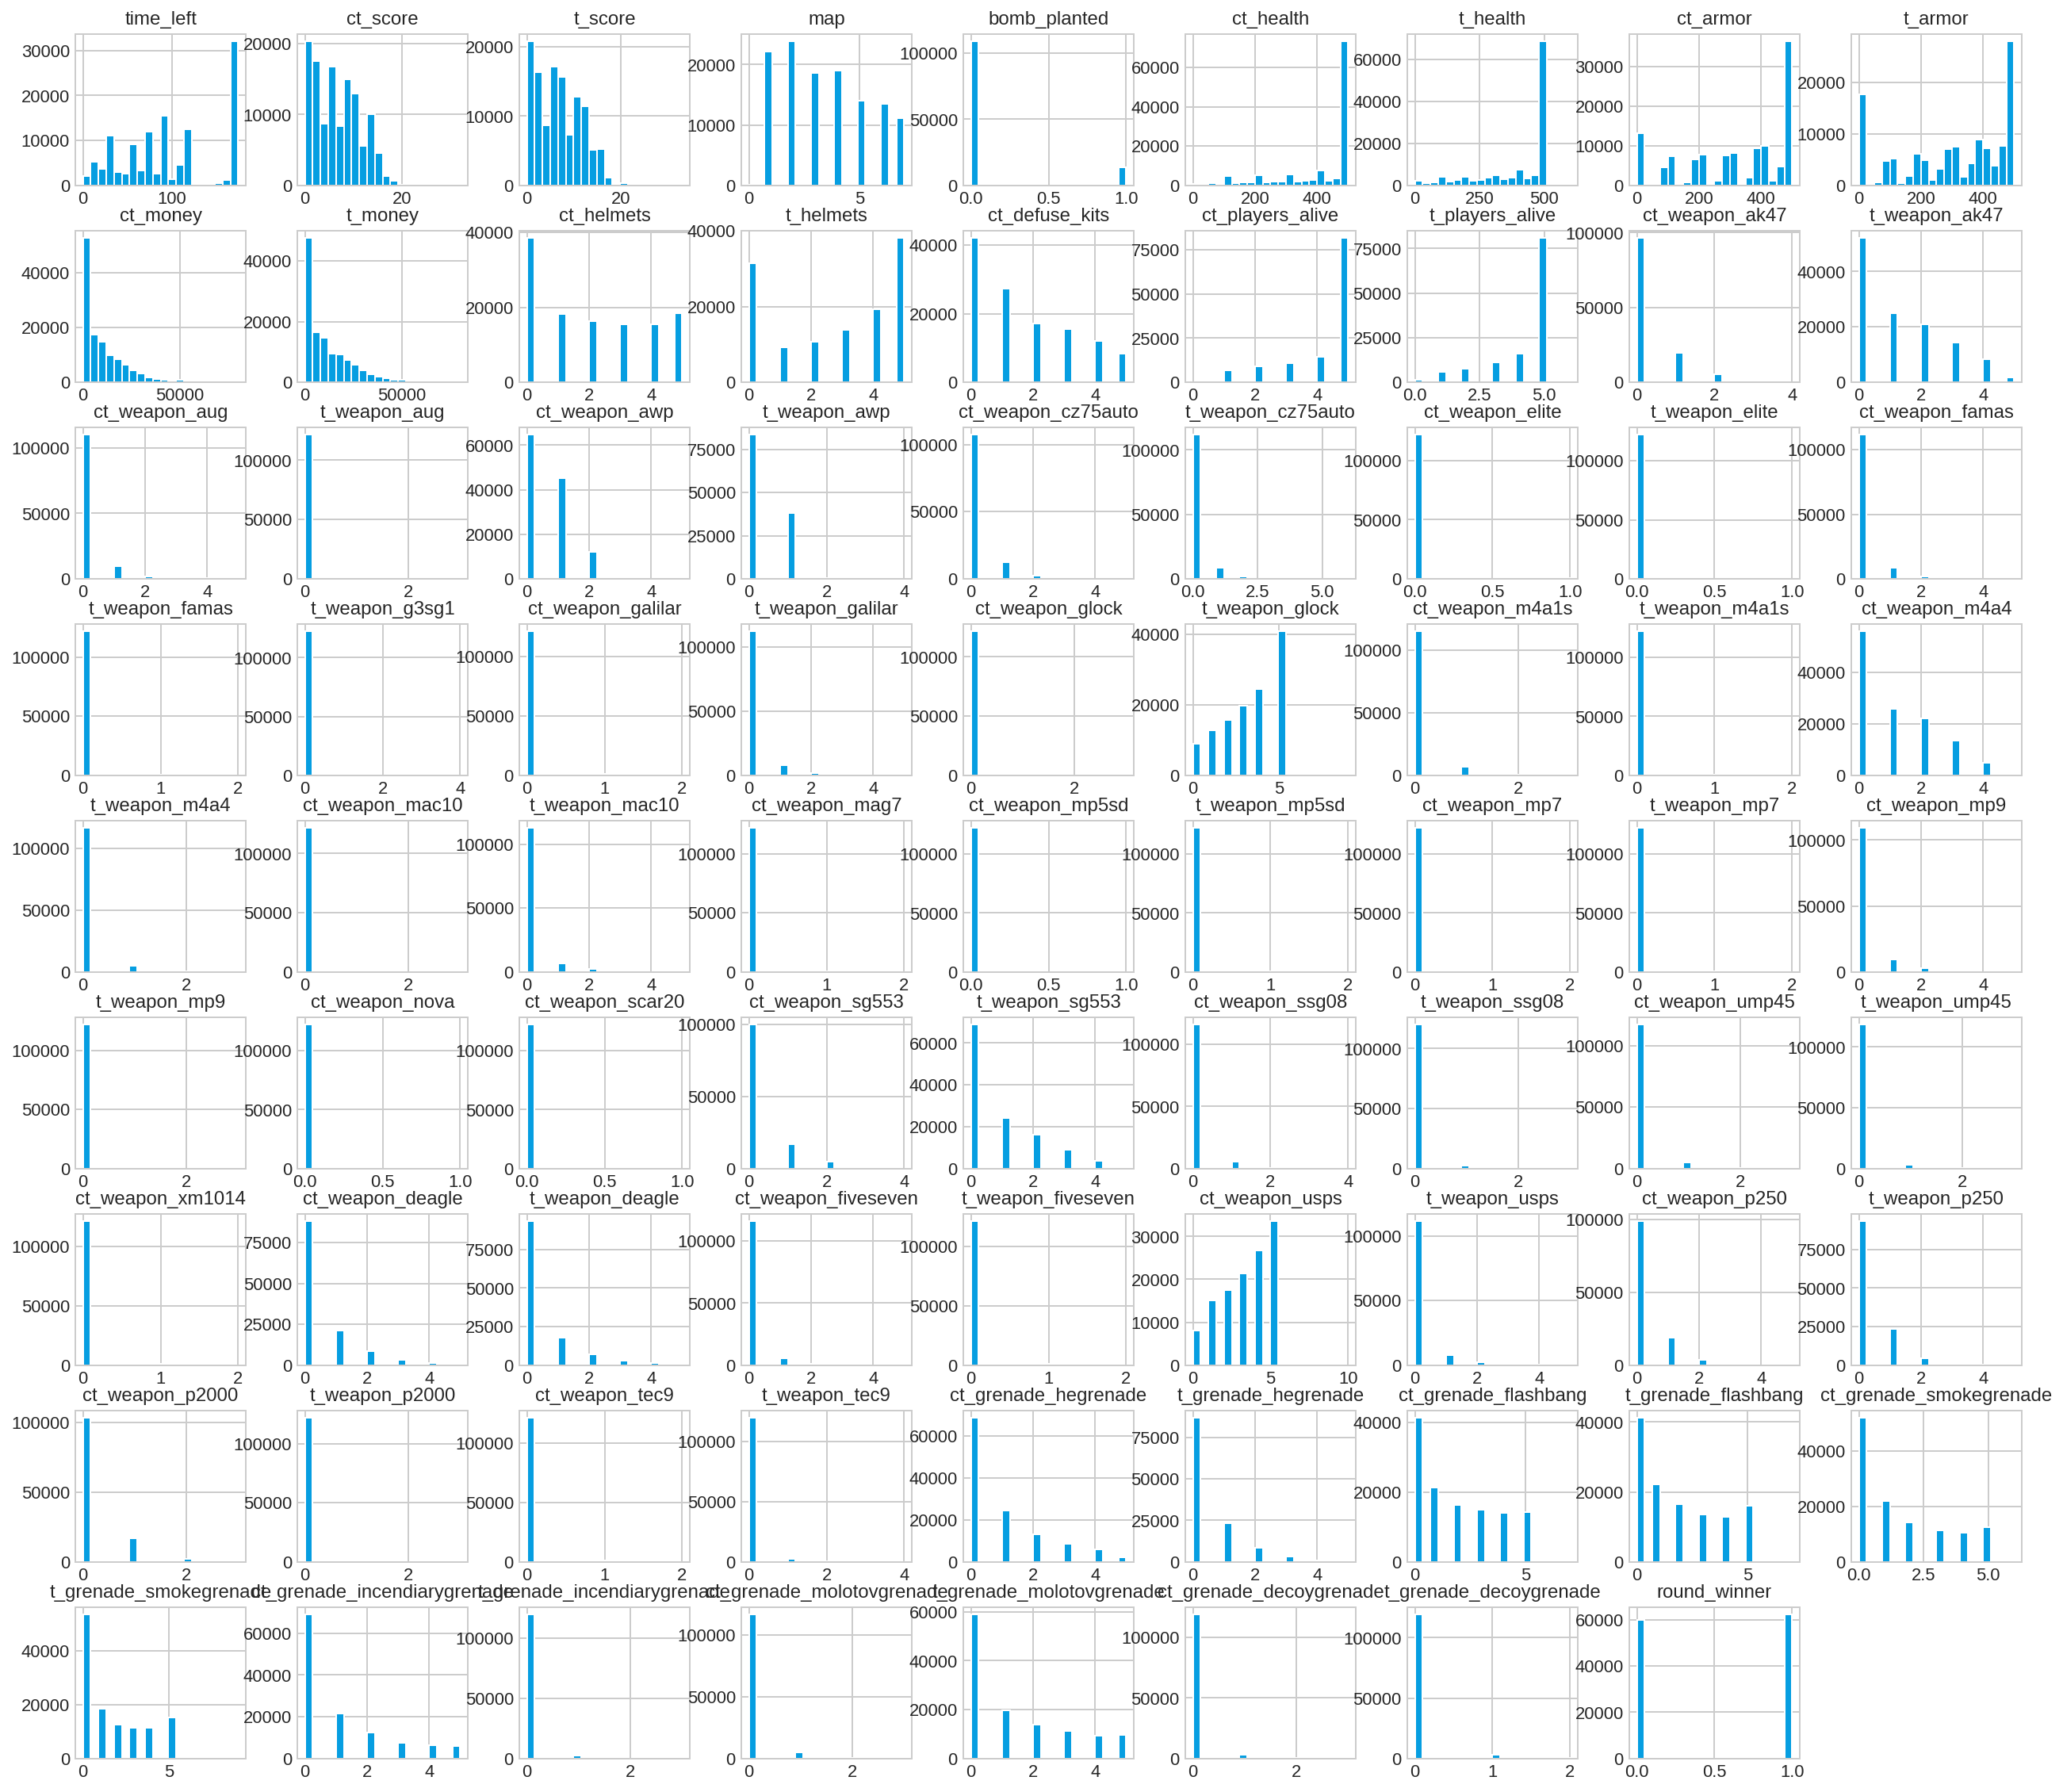

In [13]:
#Histogram plotting of all the numerical or qualitative variables present in our dataset.
#Helps us understand if there is normalcy in our data or not, from below we can say that our data seems normal.
plt.style.use('seaborn-whitegrid')
data.hist(bins=20, figsize=(22,20), color='#069EE1')
plt.show();

## Heatmap of the dataset

create a heatmap of the correlation matrix of a pandas DataFrame data, using the seaborn library for visualization.

The corr() method of a DataFrame calculates the correlation between pairs of columns in the DataFrame, resulting in a correlation matrix. The heatmap() function from seaborn library creates a heatmap of this correlation matrix.

<Axes: >

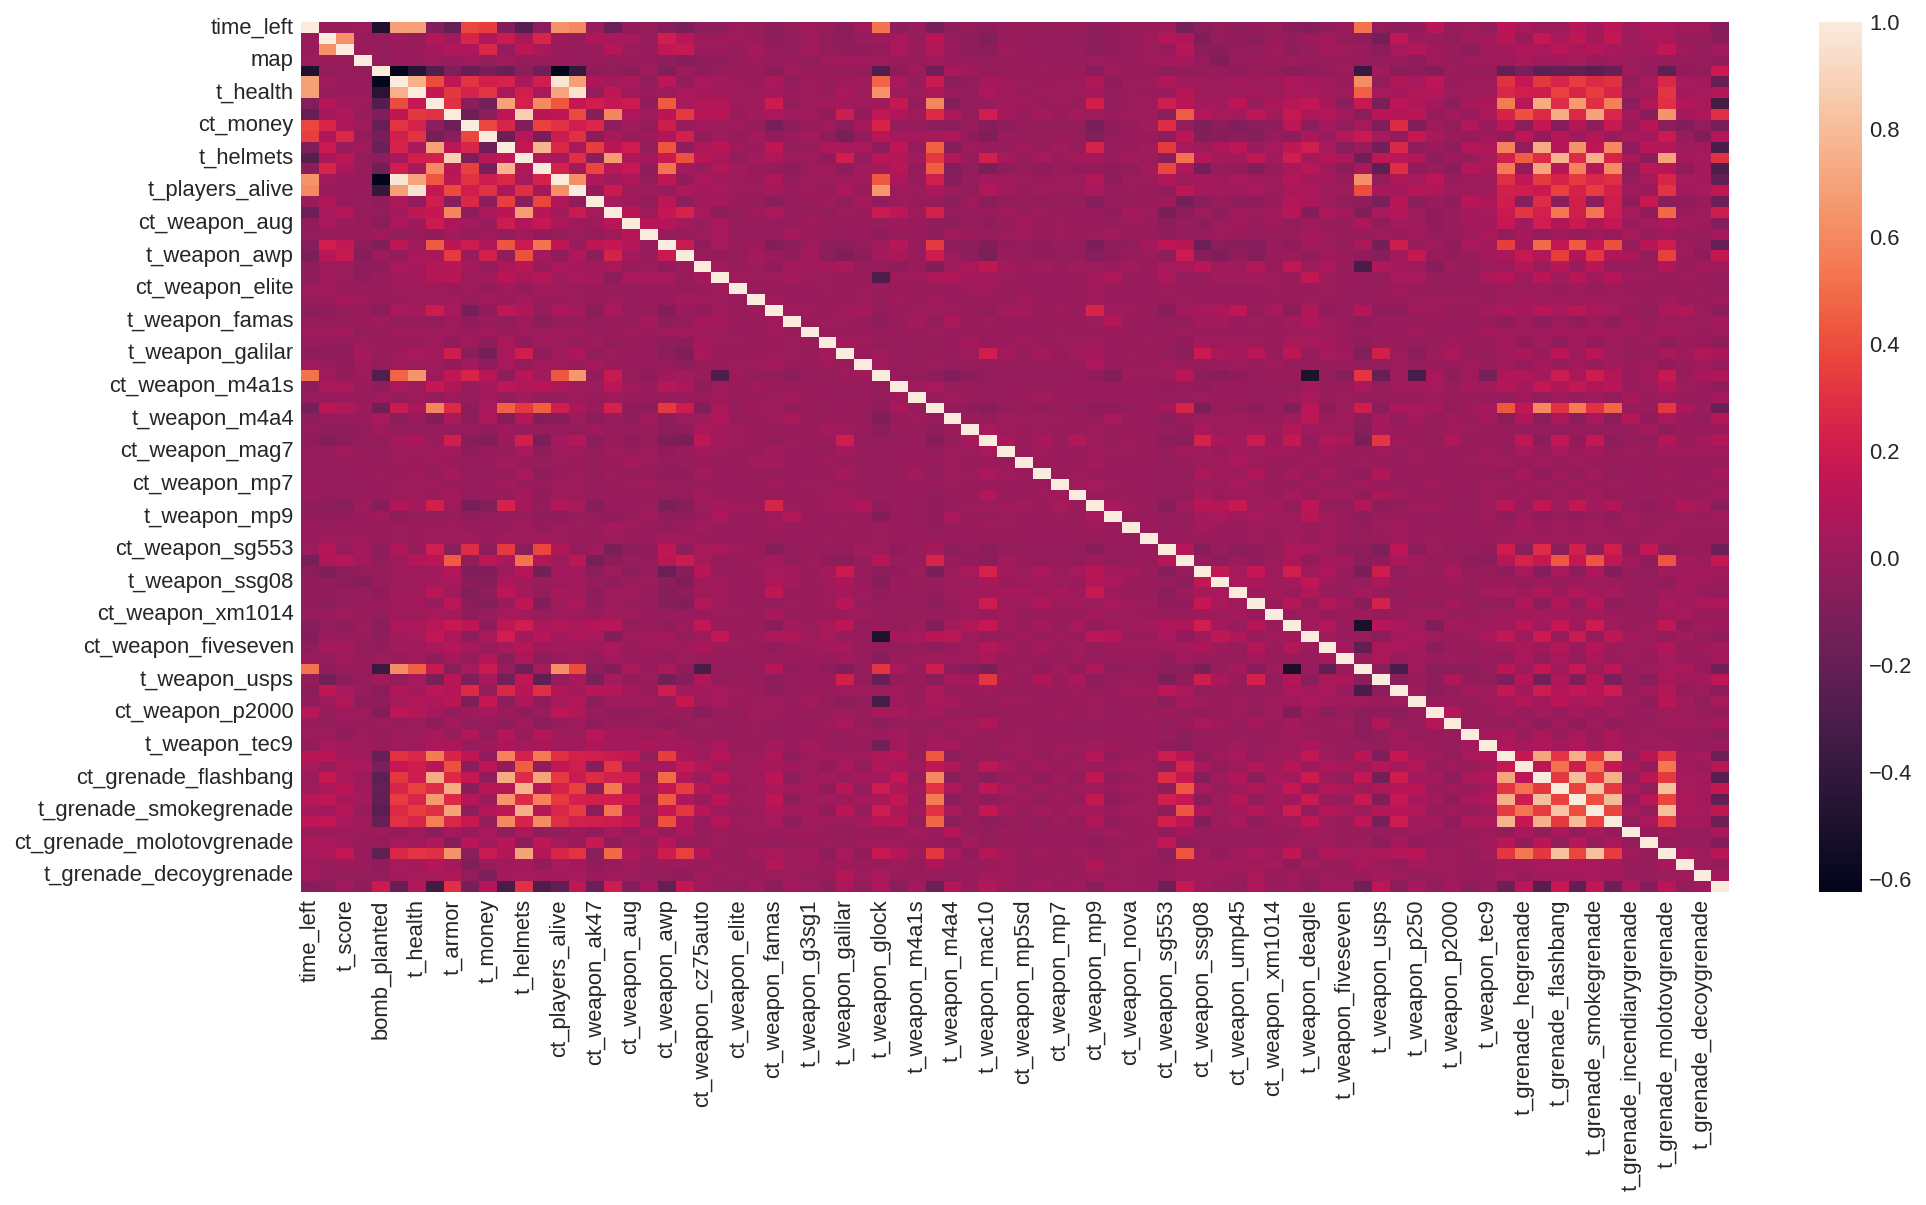

In [14]:
sns.heatmap(data.corr())

## Barplot of the dataset

create a bar plot using the seaborn library in Python. It takes in a pandas DataFrame data and two variables, x and y, which are used to define the x-axis and y-axis variables of the plot.

<Axes: xlabel='map', ylabel='round_winner'>

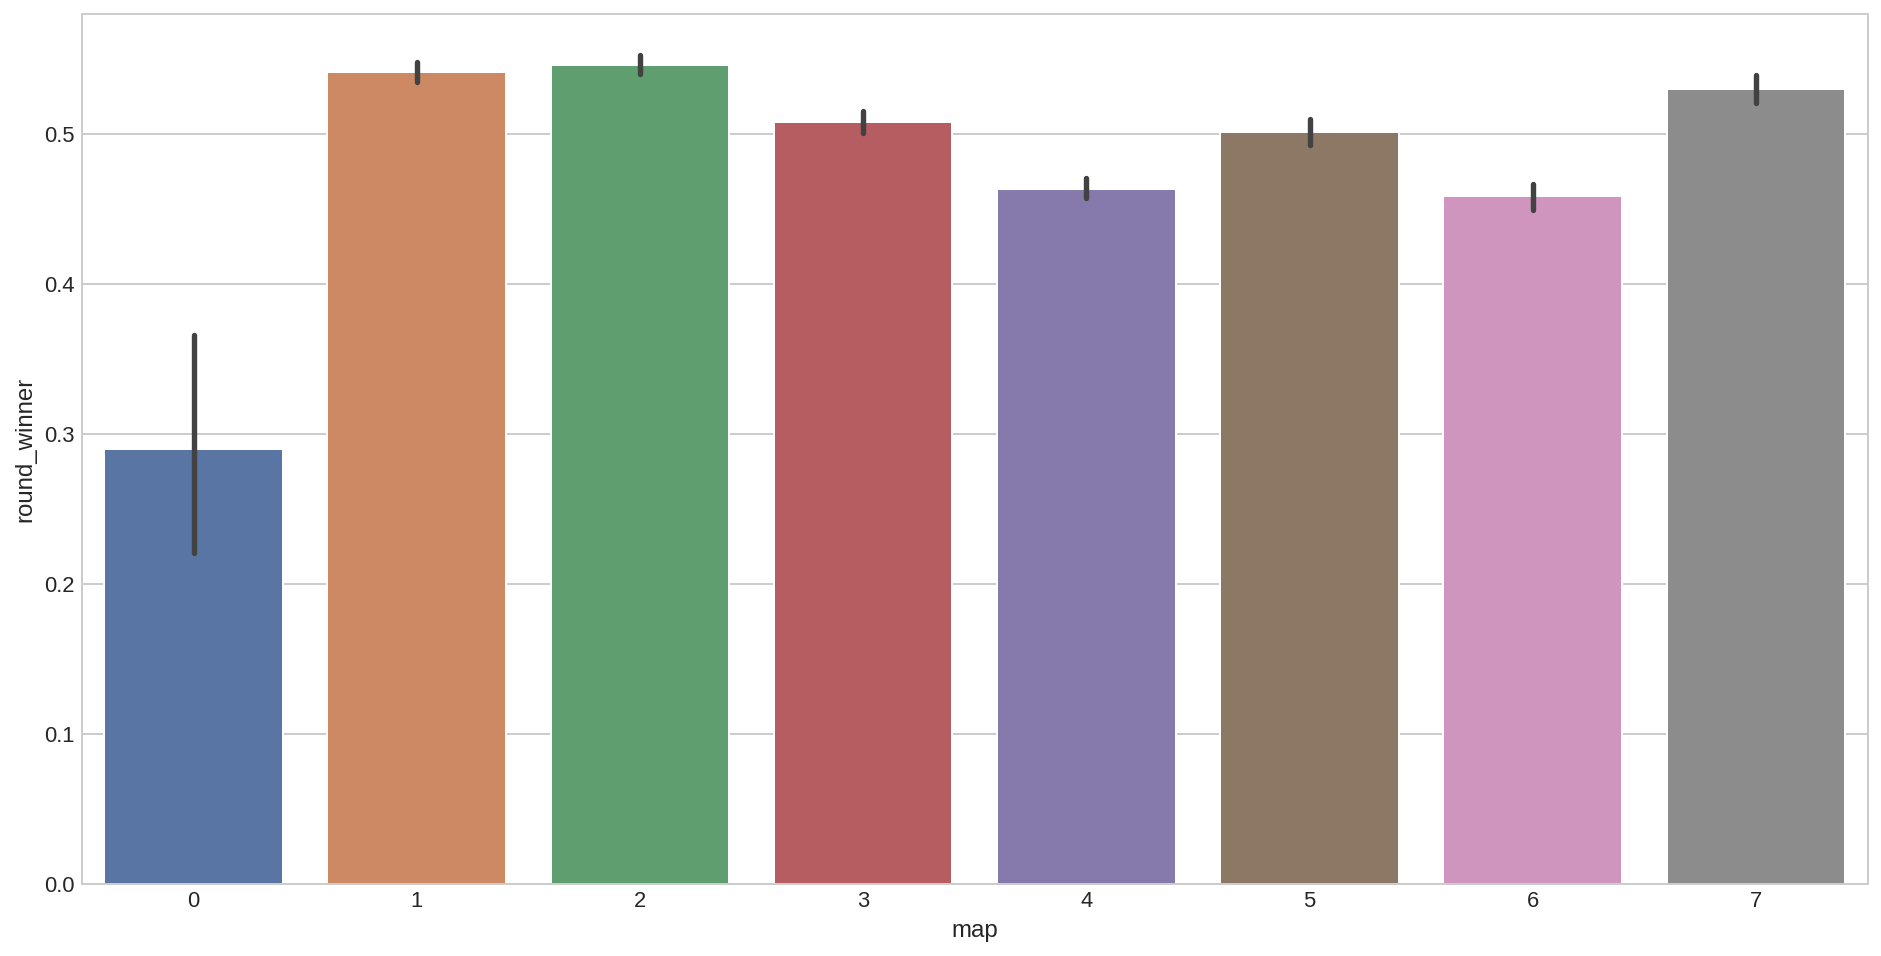

In [15]:
sns.barplot(x = data['map'], y = y, data = data)

## one-hot encoding and scaling the numerical variables

The above code is used to preprocess a pandas DataFrame called data by converting categorical variables to numerical ones using one-hot encoding and scaling the numerical variables using StandardScaler from the scikit-learn library.

In [16]:
#Normalizing all the values present in the dataset.(

data = pd.get_dummies(data)


from sklearn import preprocessing
import pandas as pd

In [17]:
# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data = pd.DataFrame(x_scaled)

In [18]:
data.head()

0        1    2         3    4      5         6      7    8   \
0  1.000000  0.00000  0.0  0.142857  0.0  1.000  0.833333  0.000  0.0   
1  0.891594  0.00000  0.0  0.142857  0.0  1.000  0.833333  0.800  0.6   
2  0.548717  0.00000  0.0  0.142857  0.0  0.782  0.666667  0.588  0.4   
3  0.434425  0.00000  0.0  0.142857  0.0  0.782  0.666667  0.588  0.4   
4  0.999829  0.03125  0.0  0.142857  0.0  1.000  0.833333  0.384  0.0   

         9   ...   69   70   71        72   73   74   75   76   77   78  
0  0.050000  ...  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.007500  ...  0.0  0.0  0.0  0.222222  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.009375  ...  0.0  0.0  0.0  0.222222  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.009375  ...  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.229375  ...  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 79 columns]

In [19]:
data2 = data.copy(deep=True)

## Splitting our dataset

creating train and test splits, It will always be better to divided in 80 and 20 ratio.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False)

In [21]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

## Linear Regression algorithm

Linear Regression algorithm from Scikit-learn library to fit a model on the training data (X_train and Y_train) and predict the output for the test data (X_test) and store it in y_pred. It then calculates the mean squared error between the actual target values (Y_test) and predicted values (y_pred) using the mean_squared_error function from the Scikit-learn library. Finally, it prints the square root of the mean squared error which gives us the Root Mean Squared Error (RMSE) value of the model's predictions.

In [22]:
#Applying linear regression and getting the mean squared error value.
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)

print('Error', np.sqrt(mean_squared_error(Y_test, y_pred)))

Error 0.4116831879527936


<Axes: title={'center': "Model Coeff's"}>

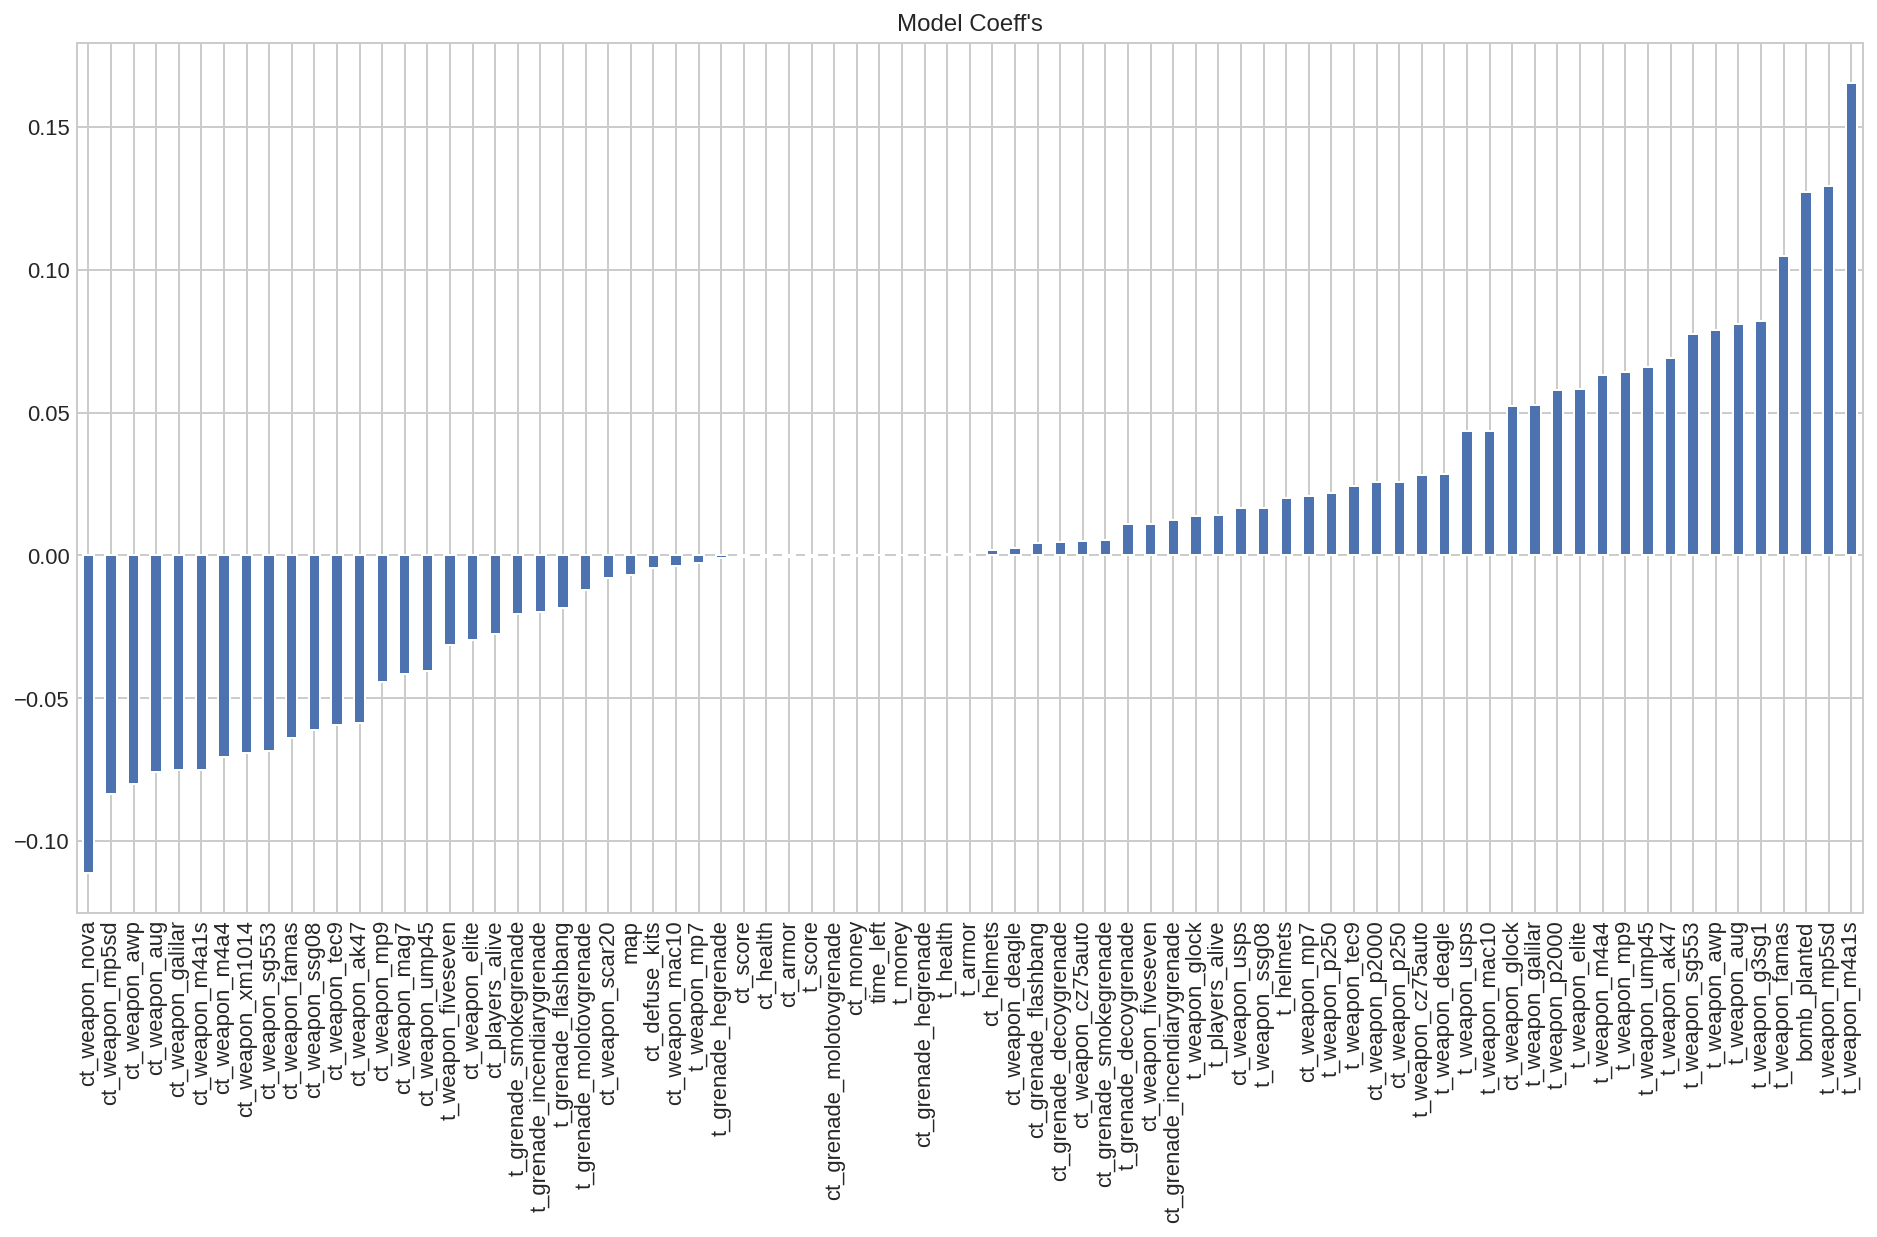

In [23]:
#Mapping regression model Coefficients, We can see the features that the model is most depended on.
coef = pd.Series(lin_reg.coef_, x.columns).sort_values()
coef.plot(kind='bar', title =  'Model Coeff\'s')

In [24]:
reg = sm.OLS(Y_train, X_train).fit()
#performing OLS regression on our data

In [25]:
#summary for the OLS regression.
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.673
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              2550.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                        0.00
Time:                        20:30:02   Log-Likelihood:                         -51394.
No. Observations:               97928   AIC:                                  1.029e+05
Df Residuals:                   97849   BIC:                                  1.037e+05
Df Model:                          79                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
time_left                     2.558e-05   1.03e-06     24.755      0.000    2.36e-05    2.76e-05
ct_score                         0.0010      0.000      2.535      0.011       0.000       0.002
t_score                          0.0013      0.000      3.315      0.001       0.001       0.002
map                              0.0035      0.001      5.387      0.000       0.002       0.005
bomb_planted                     0.2774      0.005     57.234      0.000       0.268       0.287
ct_health                       -0.0011   4.63e-05    -23.664      0.000      -0.001      -0.001
t_health                        -0.0002   3.74e-05     -4.989      0.000      -0.000      -0.000
ct_armor                        -0.0005    2.3e-05    -23.500      0.000      -0.001      -0.000
t_armor                          0.0005   2.37e-05     21.828      0.000       0.000       0.001
ct_money                        -0.0002   9.44e-06    -20.623      0.000      -0.000      -0.000
t_money                       8.424e-05    8.3e-06     10.145      0.000     6.8e-05       0.000
ct_helmets                       0.0014      0.002      0.841      0.400      -0.002       0.005
t_helmets                        0.0170      0.003      5.635      0.000       0.011       0.023
ct_defuse_kits                  -0.0005      0.002     -0.302      0.763      -0.004       0.003
ct_players_alive                 0.0610      0.013      4.740      0.000       0.036       0.086
t_players_alive                  0.0852      0.012      7.337      0.000       0.062       0.108
ct_weapon_ak47                  -0.0421      0.003    -13.705      0.000      -0.048      -0.036
t_weapon_ak47                    0.0824      0.003     28.470      0.000       0.077       0.088
ct_weapon_aug                   -0.0625      0.004    -16.636      0.000      -0.070      -0.055
t_weapon_aug                     0.0920      0.016      5.820      0.000       0.061       0.123
ct_weapon_awp                   -0.0630      0.003    -21.900      0.000      -0.069      -0.057
t_weapon_awp                     0.1024      0.004     26.435      0.000       0.095       0.110
ct_weapon_cz75auto               0.0140      0.012      1.133      0.257      -0.010       0.038
t_weapon_cz75auto                0.0337      0.012      2.916      0.004       0.011       0.056
ct_weapon_elite                 -0.0179      0.024     -0.737      0.461      -0.066       0.030
t_weapon_elite                   0.0439      0.039      1.116      0.264      -0.033       0.121
ct_weapon_famas                 -0.0509      0.004    -12.787      0.000      -0.059      -0.043
t_weapon_famas                   0.1219      0.020      6.188      0.000  

In [26]:
reg = sm.OLS(Y_test, X_test).fit()
#performing OLS regression on Test data.

In [27]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           round_winner   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              630.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):                        0.00
Time:                        20:30:03   Log-Likelihood:                         -12708.
No. Observations:               24482   AIC:                                  2.557e+04
Df Residuals:                   24403   BIC:                                  2.622e+04
Df Model:                          79                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
time_left                     3.694e-05   4.88e-06      7.575      0.000    2.74e-05    4.65e-05
ct_score                     -2.424e-06      0.001     -0.003      0.998      -0.002       0.002
t_score                          0.0052      0.001      7.179      0.000       0.004       0.007
map                             -0.0045      0.001     -3.102      0.002      -0.007      -0.002
bomb_planted                     0.1782      0.011     16.292      0.000       0.157       0.200
ct_health                       -0.0002   9.91e-05     -1.908      0.056      -0.000    5.14e-06
t_health                         0.0002   7.91e-05      1.913      0.056   -3.69e-06       0.000
ct_armor                        -0.0008   5.55e-05    -13.987      0.000      -0.001      -0.001
t_armor                          0.0002   4.72e-05      4.213      0.000       0.000       0.000
ct_money                        -0.0001   2.11e-05     -6.859      0.000      -0.000      -0.000
t_money                       1.761e-05   1.83e-05      0.963      0.335   -1.82e-05    5.35e-05
ct_helmets                      -0.0034      0.003     -1.054      0.292      -0.010       0.003
t_helmets                        0.0191      0.006      3.174      0.002       0.007       0.031
ct_defuse_kits                   0.0131      0.003      3.883      0.000       0.006       0.020
ct_players_alive                -0.2805      0.016    -17.302      0.000      -0.312      -0.249
t_players_alive                  0.1619      0.021      7.540      0.000       0.120       0.204
ct_weapon_ak47                  -0.0559      0.006     -9.651      0.000      -0.067      -0.045
t_weapon_ak47                    0.0934      0.006     15.987      0.000       0.082       0.105
ct_weapon_aug                   -0.0759      0.006    -12.854      0.000      -0.088      -0.064
t_weapon_aug                     0.0442      0.023      1.888      0.059      -0.002       0.090
ct_weapon_awp                   -0.0783      0.006    -13.290      0.000      -0.090      -0.067
t_weapon_awp                     0.1197      0.008     15.026      0.000       0.104       0.135
ct_weapon_cz75auto               0.2289      0.015     15.239      0.000       0.199       0.258
t_weapon_cz75auto               -0.0465      0.022     -2.161      0.031      -0.089      -0.004
ct_weapon_elite                  0.2232      0.042      5.359      0.000       0.142       0.305
t_weapon_elite                  -0.0077      0.046     -0.167      0.868      -0.099       0.083
ct_weapon_famas                 -0.0598      0.008     -7.430      0.000      -0.076      -0.044
t_weapon_famas                   0.1170      0.033      3.570      0.000  

##Shap analysis

SHAP (SHapley Additive exPlanations) library and loading the necessary JavaScript files to display the SHAP plots in Jupyter Notebook. It then creates a Linear Regression model object using Scikit-learn library and fits the model on the test data (X_test and Y_test) using the fit() method. This model will be used for SHAP analysis.

In [28]:
#Performing shap analysis for above regression.
shap.initjs()
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

code is using the SHAP library to compute the SHAP values for the Linear Regression model created earlier. First, a LinearExplainer object is created using the LinearRegression model object and the test data (X_test) as input. The LinearExplainer object will be used to compute the SHAP values for the model. Then, the shap_values variable is assigned the SHAP values computed by the explainer object by calling the shap_values() method on the explainer object, using the test data (X_test) as input.

In [29]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

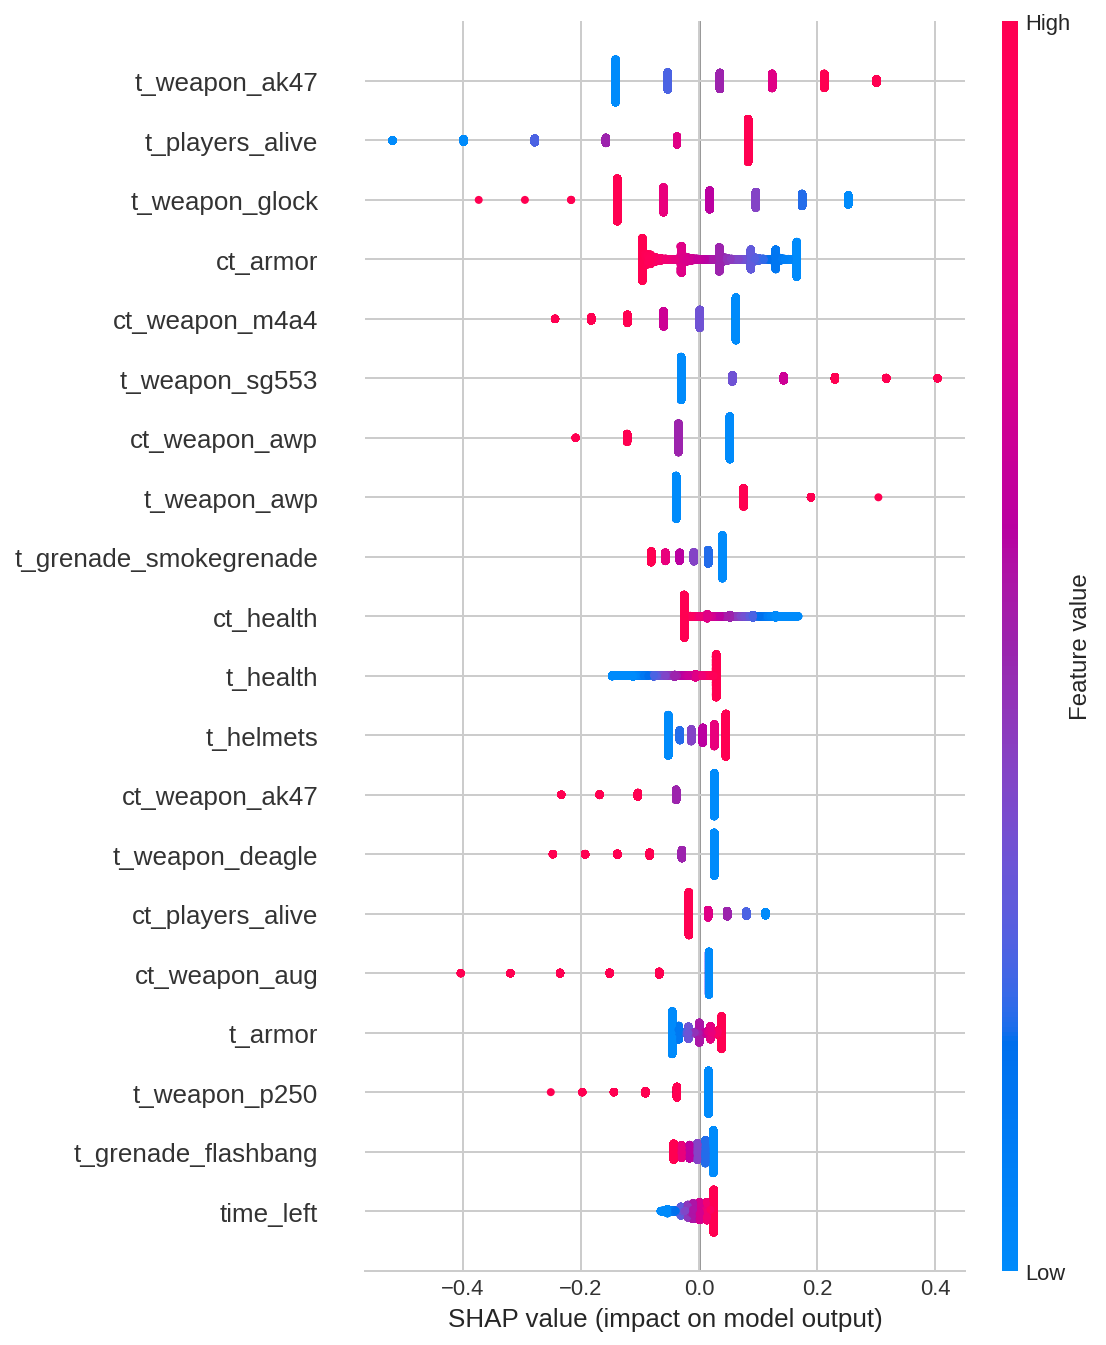

In [30]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

In [31]:
# plot the SHAP values for the 10th observation 

shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[10,:], X_test.iloc[10,:]) 

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train2, y_train2)

train_mae = evaluate(X_train2, y_train2, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}")

train MAE = 0.074


In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_test2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_test2, y_test2)

test_mae = evaluate(X_test2, y_test2, reg=pipeline)
print(f"test MAE = {round(test_mae, 3)}")

test MAE = 0.068


In [34]:
#installing treeinterpreter
! pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter as ti

rand_forest = RandomForestRegressor()
rand_forest.fit(X_train2, y_train2)

print("Test  R^2 Score : %.2f"%rand_forest.score(X_test2, y_test2))
print("Train R^2 Score : %.2f"%rand_forest.score(X_train2, y_train2))

Test  R^2 Score : 0.35
Train R^2 Score : 0.95


<BarContainer object of 79 artists>

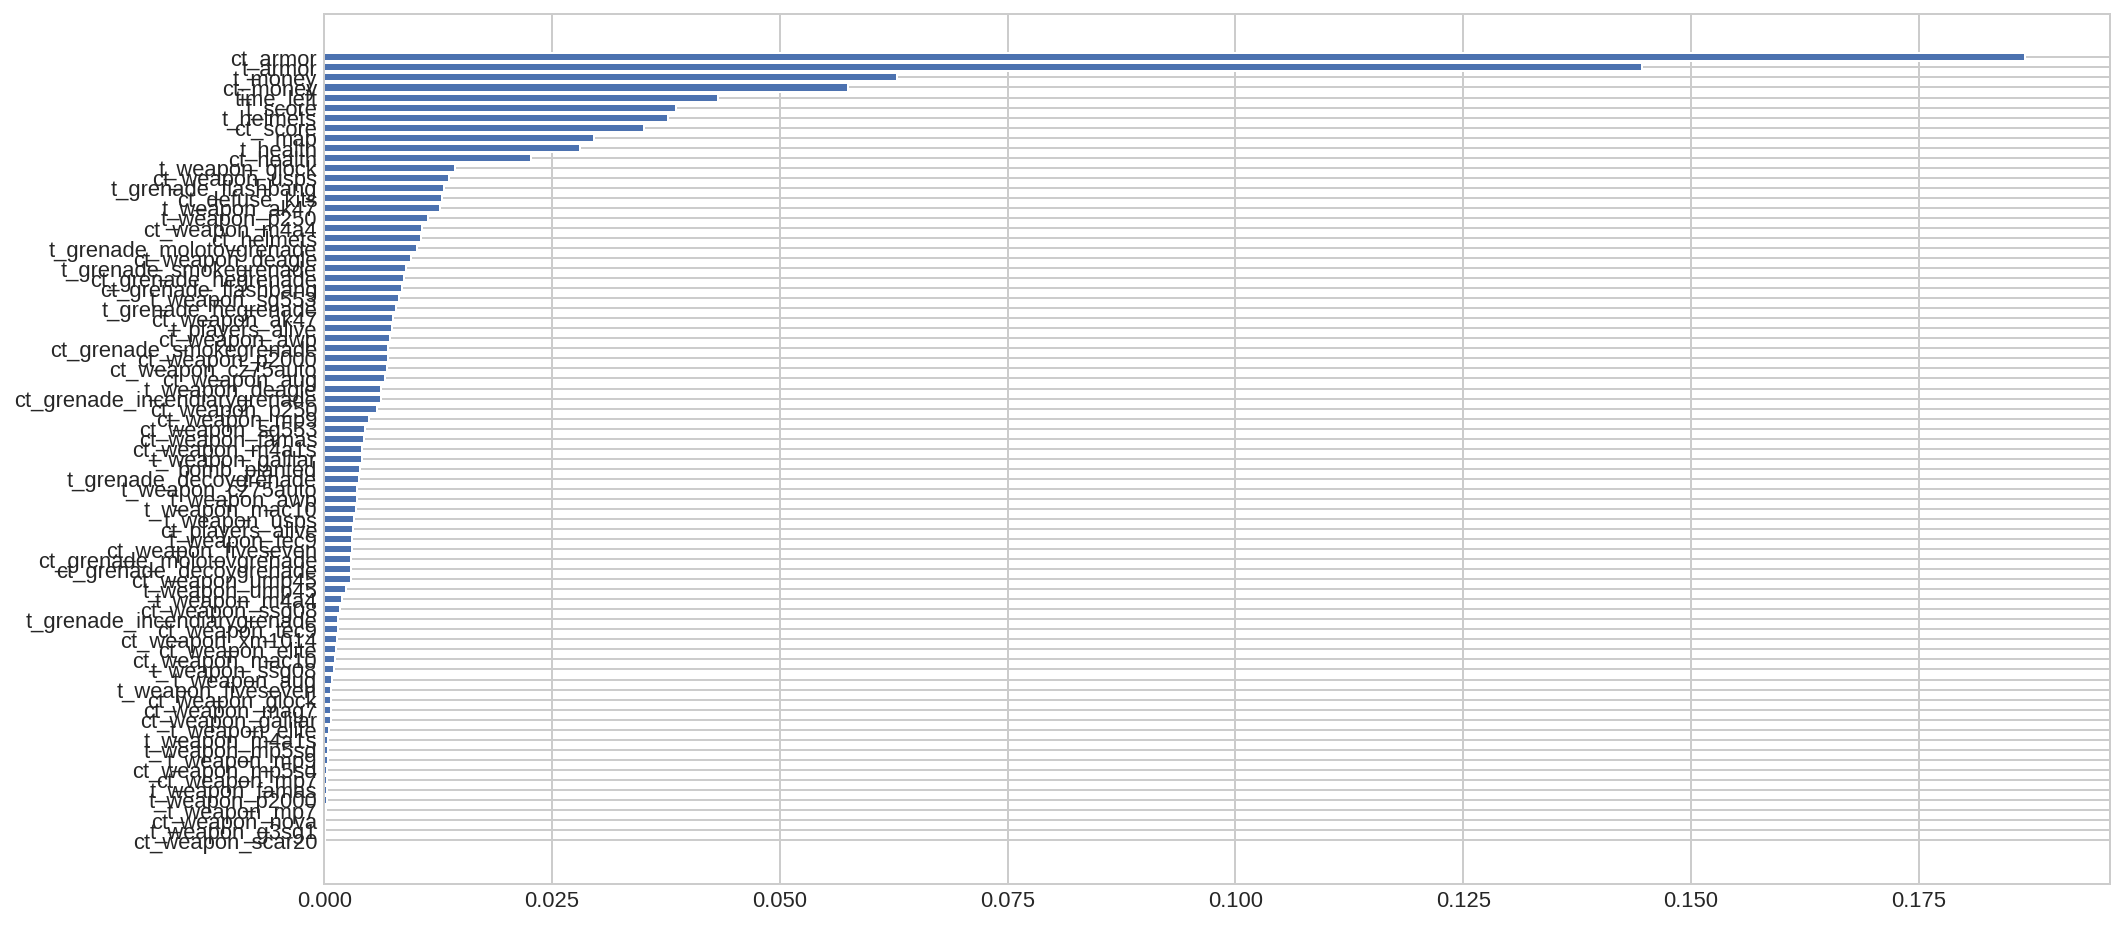

In [36]:
#looking for Feature importance 
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [37]:
datac = pd.get_dummies(datac)

In [38]:
datac2 = datac.copy(deep=True)

In [39]:
datac2

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  \
0          175.00         0        0         False        500       500   
1          156.03         0        0         False        500       500   
2           96.03         0        0         False        391       400   
3           76.03         0        0         False        391       400   
4          174.97         1        0         False        500       500   
...           ...       ...      ...           ...        ...       ...   
122405      15.41        11       14          True        200       242   
122406     174.93        11       15         False        500       500   
122407     114.93        11       15         False        500       500   
122408      94.93        11       15         False        500       500   
122409      74.93        11       15         False        375       479   

        ct_armor  t_armor  ct_money  t_money  ...  map_de_cache  map_de_dust2  \
0              0        0      4000     4000  ...             0             1   
1            400      300       600      650  ...             0             1   
2            294      200       750      500  ...             0             1   
3            294      200       750      500  ...             0             1   
4            192        0     18350    10750  ...             0             1   
...          ...      ...       ...      ...  ...           ...           ...   
122405       195      359       100     5950  ...             0             0   
122406        95      175     11500    23900  ...             0             0   
122407       495      475      1200     6700  ...             0             0   
122408       495      475      1200     6700  ...             0             0   
122409       395      466      1100     7000  ...             0             0   

        map_de_inferno  map_de_mirage  map_de_nuke  map_de_overpass  \
0                    0              0            0                0   
1                    0              0            0                0   
2                    0              0            0                0   
3                    0              0            0                0   
4                    0              0            0                0   
...                ...            ...          ...              ...   
122405               0              0            0                0   
122406               0              0            0                0   
122407               0              0            0                0   
122408               0              0            0                0   
122409               0              0            0                0   

        map_de_train  map_de_vertigo  round_winner_CT  round_winner_T  
0                  0               0                1               0  
1                  0               0                1               0  
2                  0               0                1               0  
3                  0               0                1               0  
4                  0               0                1               0  
...              ...             ...              ...             ...  
122405             1               0                0               1  
122406             1               0                0               1  
122407             1               0                0               1  
122408             1               0                0               1  
122409             1               0                0               1  

[122410 rows x 105 columns]

In [40]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y2 = y
datac2.drop(['round_winner_CT'],axis=1,inplace=True)
x2 = datac2.copy(deep=True)

In [41]:
#creating training and test data split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=False)
#setting my model as Random forest classifier.
my_model = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)

In [42]:
# Create object that can calculate shap values
#explainer = shap.TreeExplainer(my_model)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
#shap_values = explainer.shap_values(X_test2)
# Make plot. Index of [1] is explained in text below.
#shap.summary_plot(shap_values[1], X_test2)

In [43]:
# plot the SHAP values for the 10th observation 
#shap.initjs()
#shap.force_plot(explainer.expected_value[1],shap_values[1][10,:], X_test2.iloc[10,:]) 

In [44]:
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], X_test2)

In [45]:
! pip install h2o
#Installing H20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=af6bd6c384ca2fdcf3705597af36be01cafebc2304bb91d46176baa4a57cbfe5
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [46]:
#Importing h2o and automl modules.
import h2o
from h2o.automl import H2OAutoML
import os

In [47]:
h2o.init(strict_version_check=False)
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpizu2lvzc
  JVM stdout: /tmp/tmpizu2lvzc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpizu2lvzc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_unknownUser_p14wyl
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

## Importing our dataset with H2O.

In [48]:
df = h2o.import_file("https://raw.githubusercontent.com/7srik/Auto_ML_CSGO_Round_Winner/main/csgo_round_snapshots.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [49]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])
#creating training , testing and validating datasets with 70,15,15 ratio.

In [50]:
y3 = "round_winner"
x3 = df.columns
x3.remove(y3)
#Differntiating X and Y

## Using H2O automl

In [51]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)
#Applying automl it will run max of 10 models and we won't be excluding any model.

In [52]:
aml.train(x = x3, y = y3, training_frame = df_train, validation_frame=df_valid)
#Training the automl model with train dataset, and we are using validation dataset for validating all the models involved

AutoML progress: |
20:37:54.542: Project: AutoML_1_20230325_203754
20:37:54.543: Cross-validation disabled by user: no fold column nor nfolds > 1.
20:37:54.544: Setting stopping tolerance adaptively based on the training frame: 0.003413605549038255
20:37:54.551: Build control seed: 10
20:37:54.552: training frame: Frame key: AutoML_1_20230325_203754_training_py_2_sid_aab3    cols: 97    rows: 85817  chunks: 8    size: 4319144  checksum: 7682004882666221367
20:37:54.553: validation frame: Frame key: py_4_sid_aab3    cols: 97    rows: 18442  chunks: 8    size: 985108  checksum: 894622801074222586
20:37:54.554: leaderboard frame: Frame key: py_4_sid_aab3    cols: 97    rows: 18442  chunks: 8    size: 985108  checksum: 894622801074222586
20:37:54.556: blending frame: NULL
20:37:54.556: response column: round_winner
20:37:54.556: fold column: null
20:37:54.558: weights column: null
20:37:54.621: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20230325_203754


Model Summary: 
    number_of_trees
--  -----------------
    310

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.01806886696100113
RMSE: 0.13442048564486414
LogLoss: 0.09029546236750415
Mean Per-Class Error: 0.011075876026749046
AUC: 0.9993828459727498
AUCPR: 0.9994172307365057
Gini: 0.9987656919454997

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4957236376675693
       CT     T      Error    Rate
-----  -----  -----  -------  ---------------
CT     41494  476    0.0113   (476.0/41970.0)
T      474    43373  0.0108   (474.0/43847.0)
Total  41968  43849  0.0111   (950.0/85817.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.495724     0.989167  203
max f2                       0.433987     0.991605  215
max f0point5                 0.583637     0.991895  183
max accuracy                 0.495724     0.98893   203
max precision                0.99989      1         0
max recall                   0.0780173    1         338
max specificity              0.99989      1         0
max absolute_mcc             0.495724     0.977849  203
max min_per_class_accuracy   0.499784     0.988754  202
max mean_per_class_accuracy  0.495724     0.988924  203
max tns                      0.99989      41970     0
max fns                      0.99989      38832     0
max fps                      0.000134184  41970     399
max tps                      0.0780173    43847     338
max tnr                      0.99989      1         0
max fnr                      0.99989      0.885625  0
max fpr                      0.000134184  1         399
max tpr                      0.0780173    1         338

Gains/Lift Table: Avg response rate: 51.09 %, avg score: 51.10 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100796                   0.999983           1.95719     1.95719            1                0.999992     1                           0.999992            0.0197277       0.0197277                  95.7192   95.7192            0.0197277
2        0.020031                    0.999955           1.95719     1.95719            1                0.99997      1                           0.999981            0.0194768       0.0392045                  95.7192   95.7192            0.0392045
3        0.0300174                   0.999914           1.95719     1.95719            1                0.999935     1                           0.999966            0.0195452       0.0587497                  95.7192   95.7192            0.0587497
4        0.0400037                   0.999861           1.95719     1.95719            1                0.99989      1                           0.999947            0.0195452       0.078295                   95.7192   95.7192            0.078295
5        0.0500134                   0.999789           1.95719     1.95719            1                0.999828     1                           0.999923            0.0195909       0.0978858                  95.7192   95.7192            0.0978858
6        0.100003                    0.998915           1.95719     1.95719            1                0.999454     1                           0.999689            0.0978402       0.195726                   95.7192   95.7192            0.195726
7        0.150005                    0.99

In [53]:
lb = aml.leaderboard

In [54]:
lb.head()

model_id                                 auc    logloss     aucpr    mean_per_class_error      rmse        mse
----------------------------------  --------  ---------  --------  ----------------------  --------  ---------
XGBoost_2_AutoML_1_20230325_203754  0.938622   0.321633  0.942809                0.138568  0.313598  0.0983436
GBM_4_AutoML_1_20230325_203754      0.936628   0.328754  0.940276                0.140675  0.321142  0.103132
XGBoost_1_AutoML_1_20230325_203754  0.933414   0.33181   0.938151                0.146505  0.321335  0.103256
GBM_1_AutoML_1_20230325_203754      0.931966   0.336584  0.936584                0.15201   0.326593  0.106663
DRF_1_AutoML_1_20230325_203754      0.925663   0.371117  0.930031                0.156254  0.343933  0.11829
GBM_3_AutoML_1_20230325_203754      0.922219   0.359041  0.927363                0.165179  0.339308  0.11513
GBM_2_AutoML_1_20230325_203754      0.909856   0.380982  0.916669                0.176791  0.351975  0.123887
XGBoost_3_AutoML_1_20230325_203754  0.907351   0.379246  0.915236                0.192999  0.352854  0.124506
XRT_1_AutoML_1_20230325_203754      0.894133   0.448146  0.902438                0.211704  0.381096  0.145234
GLM_1_AutoML_1_20230325_203754      0.843749   0.478445  0.857173                0.273822  0.40043   0.160344
[10 rows x 7 columns]

In [55]:
df_pred=aml.leader.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [56]:
df_pred.head()

predict             CT           T
---------  -----------  ----------
T          0.000416458  0.999584
T          0.00144774   0.998552
CT         0.998906     0.00109414
T          0.0521083    0.947892
CT         0.945903     0.0540968
CT         0.935203     0.0647971
CT         0.997185     0.00281499
CT         0.996997     0.00300328
CT         0.594288     0.405712
T          0.00110197   0.998898
[10 rows x 3 columns]

In [57]:
aml.leader.model_performance(df_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.09744699989285459
RMSE: 0.3121650202903179
LogLoss: 0.3171980104228696
Mean Per-Class Error: 0.13881771655690137
AUC: 0.9402953492210365
AUCPR: 0.9427062361862352
Gini: 0.880590698442073

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4387456799546878
       CT    T     Error    Rate
-----  ----  ----  -------  ----------------
CT     7432  1489  0.1669   (1489.0/8921.0)
T      1022  8208  0.1107   (1022.0/9230.0)
Total  8454  9697  0.1383   (2511.0/18151.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.438746     0.867332  216
max f2                       0.148498     0.910737  316
max f0point5                 0.703887     0.884995  129
max accuracy                 0.521141     0.863919  189
max precision                0.999838     0.997664  0
max recall                   0.000162876  1         399
max specificity              0.999838     0.999664  0
max absolute_mcc             0.521141     0.727878  189
max min_per_class_accuracy   0.510225     0.863356  193
max mean_per_class_accuracy  0.521141     0.863989  189
max tns                      0.999838     8918      0
max fns                      0.999838     7949      0
max fps                      0.000162876  8921      399
max tps                      0.000162876  9230      399
max tnr                      0.999838     0.999664  0
max fnr                      0.999838     0.861213  0
max fpr                      0.000162876  1         399
max tpr                      0.000162876  1         399

Gains/Lift Table: Avg response rate: 50.85 %, avg score: 51.14 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100821                   0.99998            1.96652    1.96652            1                0.999992     1                           0.999992            0.0198267       0.0198267                  96.6522   96.6522            0.0198267
2        0.020054                    0.99995            1.96652    1.96652            1                0.999967     1                           0.999979            0.01961         0.0394366                  96.6522   96.6522            0.0394366
3        0.0300259                   0.999914           1.96652    1.96652            1                0.999933     1                           0.999964            0.01961         0.0590466                  96.6522   96.6522            0.0590466
4        0.0400529                   0.999864           1.96652    1.96652            1                0.999887     1                           0.999945            0.0197183       0.0787649                  96.6522   96.6522            0.0787649
5        0.0500248                   0.999779           1.96652    1.96652            1                0.999824     1                           0.999921            0.01961         0.0983749                  96.6522   96.6522            0.0983749
6        0.10005                     0.998825           1.95136    1.95894            0.992291         0.999413     0.996145                    0.999667            0.0976165       0.195991                   95.1362   95.8942            0.195207
7        0.150019                    0.994889           1.93183    1.94991            0.982359         0.997355     0.991553                    0.998896            0.096533        0.292524                   93.1832   94.9912          

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                 auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo     predict             CT         T
----------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------  ---------  -----------  --------
XGBoost_2_AutoML_1_20230325_203754  0.940295   0.317198  0.942706                0.138818  0.312165  0.097447              305797                   0.068884  XGBoost  T          0.000416458  0.999584
GBM_4_AutoML_1_20230325_203754      0.939006   0.322211  0.942272                0.140384  0.31826   0.101289               82687                   0.067964  GBM      T          0.00901977   0.99098
XGBoost_1_AutoML_1_20230325_203754  0.936129   0.32373   0.93971                 0.147713  0.319035  0.101783              210322                   0.029543  XGBoost  T          0.000629723  0.99937
GBM_1_AutoML_1_20230325_203754      0.934057   0.331133  0.937905                0.150092  0.324403  0.105237              107936                   0.123959  GBM      T          0.0140155    0.985984
DRF_1_AutoML_1_20230325_203754      0.929183   0.365624  0.932137                0.151864  0.340406  0.115876               43846                   0.028844  DRF      T          0.0296196    0.97038
GBM_3_AutoML_1_20230325_203754      0.924605   0.352817  0.929088                0.165415  0.336641  0.113327               84783                   0.080541  GBM      T          0.00747733   0.992523
GBM_2_AutoML_1_20230325_203754      0.914564   0.372506  0.920036                0.180219  0.347702  0.120897               74125                   0.103375  GBM      T          0.012044     0.987956
XGBoost_3_AutoML_1_20230325_203754  0.909634   0.374809  0.916495                0.18851   0.350602  0.122921              161821                   0.030746  XGBoost  T          0.00245976   0.99754
XRT_1_AutoML_1_20230325_203754      0.90003    0.441769  0.90704                 0.202302  0.377548  0.142542               42946                   0.049581  DRF      T          0.150569     0.849431
GLM_1_AutoML_1_20230325_203754      0.850075   0.469806  0.861709                0.268049  0.396235  0.157002               14299                   0.009969  GLM      T          0.128066     0.871934
[10 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

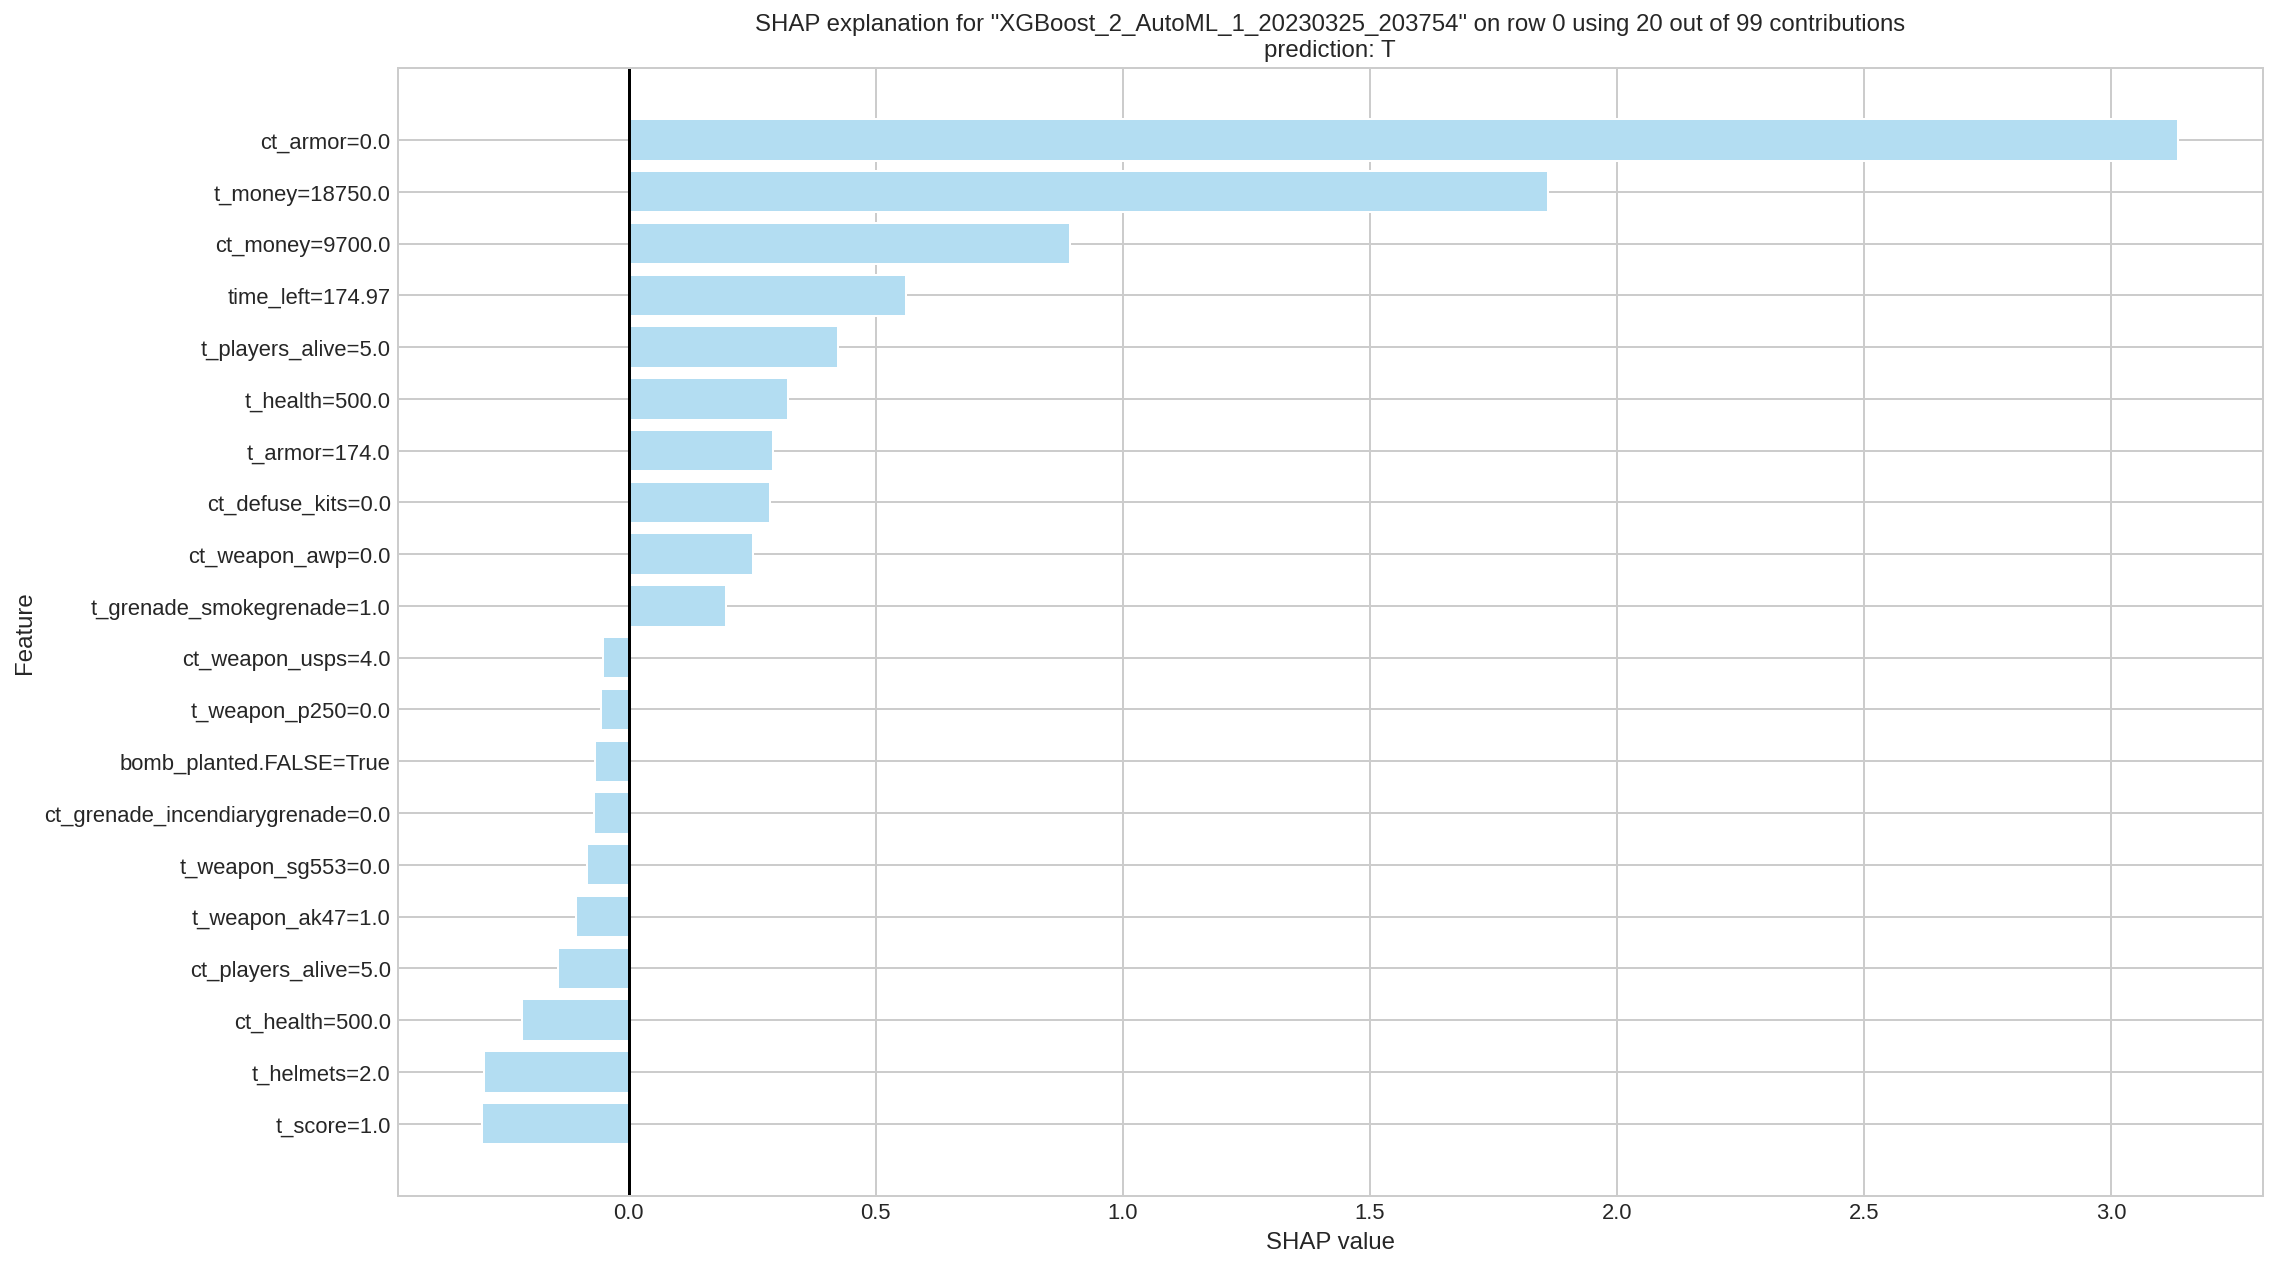

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                 auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo     predict             CT         T
----------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------  ---------  -----------  --------
XGBoost_2_AutoML_1_20230325_203754  0.940295   0.317198  0.942706                0.138818  0.312165  0.097447              305797                   0.068884  XGBoost  T          0.000416458  0.999584
GBM_4_AutoML_1_20230325_203754      0.939006   0.322211  0.942272                0.140384  0.31826   0.101289               82687                   0.067964  GBM      T          0.00901977   0.99098
XGBoost_1_AutoML_1_20230325_203754  0.936129   0.32373   0.93971                 0.147713  0.319035  0.101783              210322                   0.029543  XGBoost  T          0.000629723  0.99937
GBM_1_AutoML_1_20230325_203754      0.934057   0.331133  0.937905                0.150092  0.324403  0.105237              107936                   0.123959  GBM      T          0.0140155    0.985984
DRF_1_AutoML_1_20230325_203754      0.929183   0.365624  0.932137                0.151864  0.340406  0.115876               43846                   0.028844  DRF      T          0.0296196    0.97038
GBM_3_AutoML_1_20230325_203754      0.924605   0.352817  0.929088                0.165415  0.336641  0.113327               84783                   0.080541  GBM      T          0.00747733   0.992523
GBM_2_AutoML_1_20230325_203754      0.914564   0.372506  0.920036                0.180219  0.347702  0.120897               74125                   0.103375  GBM      T          0.012044     0.987956
XGBoost_3_AutoML_1_20230325_203754  0.909634   0.374809  0.916495                0.18851   0.350602  0.122921              161821                   0.030746  XGBoost  T          0.00245976   0.99754
XRT_1_AutoML_1_20230325_203754      0.90003    0.441769  0.90704                 0.202302  0.377548  0.142542               42946                   0.049581  DRF      T          0.150569     0.849431
GLM_1_AutoML_1_20230325_203754      0.850075   0.469806  0.861709                0.268049  0.396235  0.157002               14299                   0.009969  GLM      T          0.128066     0.871934
[10 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [58]:
aml.explain_row(df_test, row_index=0)
#using shap explain for single row ie: 1st observation.
#we can see that below observations are pretty self expainatory.

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_2_AutoML_1_20230325_203754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4387456799546878
       CT    T     Error    Rate
-----  ----  ----  -------  ----------------
CT     7432  1489  0.1669   (1489.0/8921.0)
T      1022  8208  0.1107   (1022.0/9230.0)
Total  8454  9697  0.1383   (2511.0/18151.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

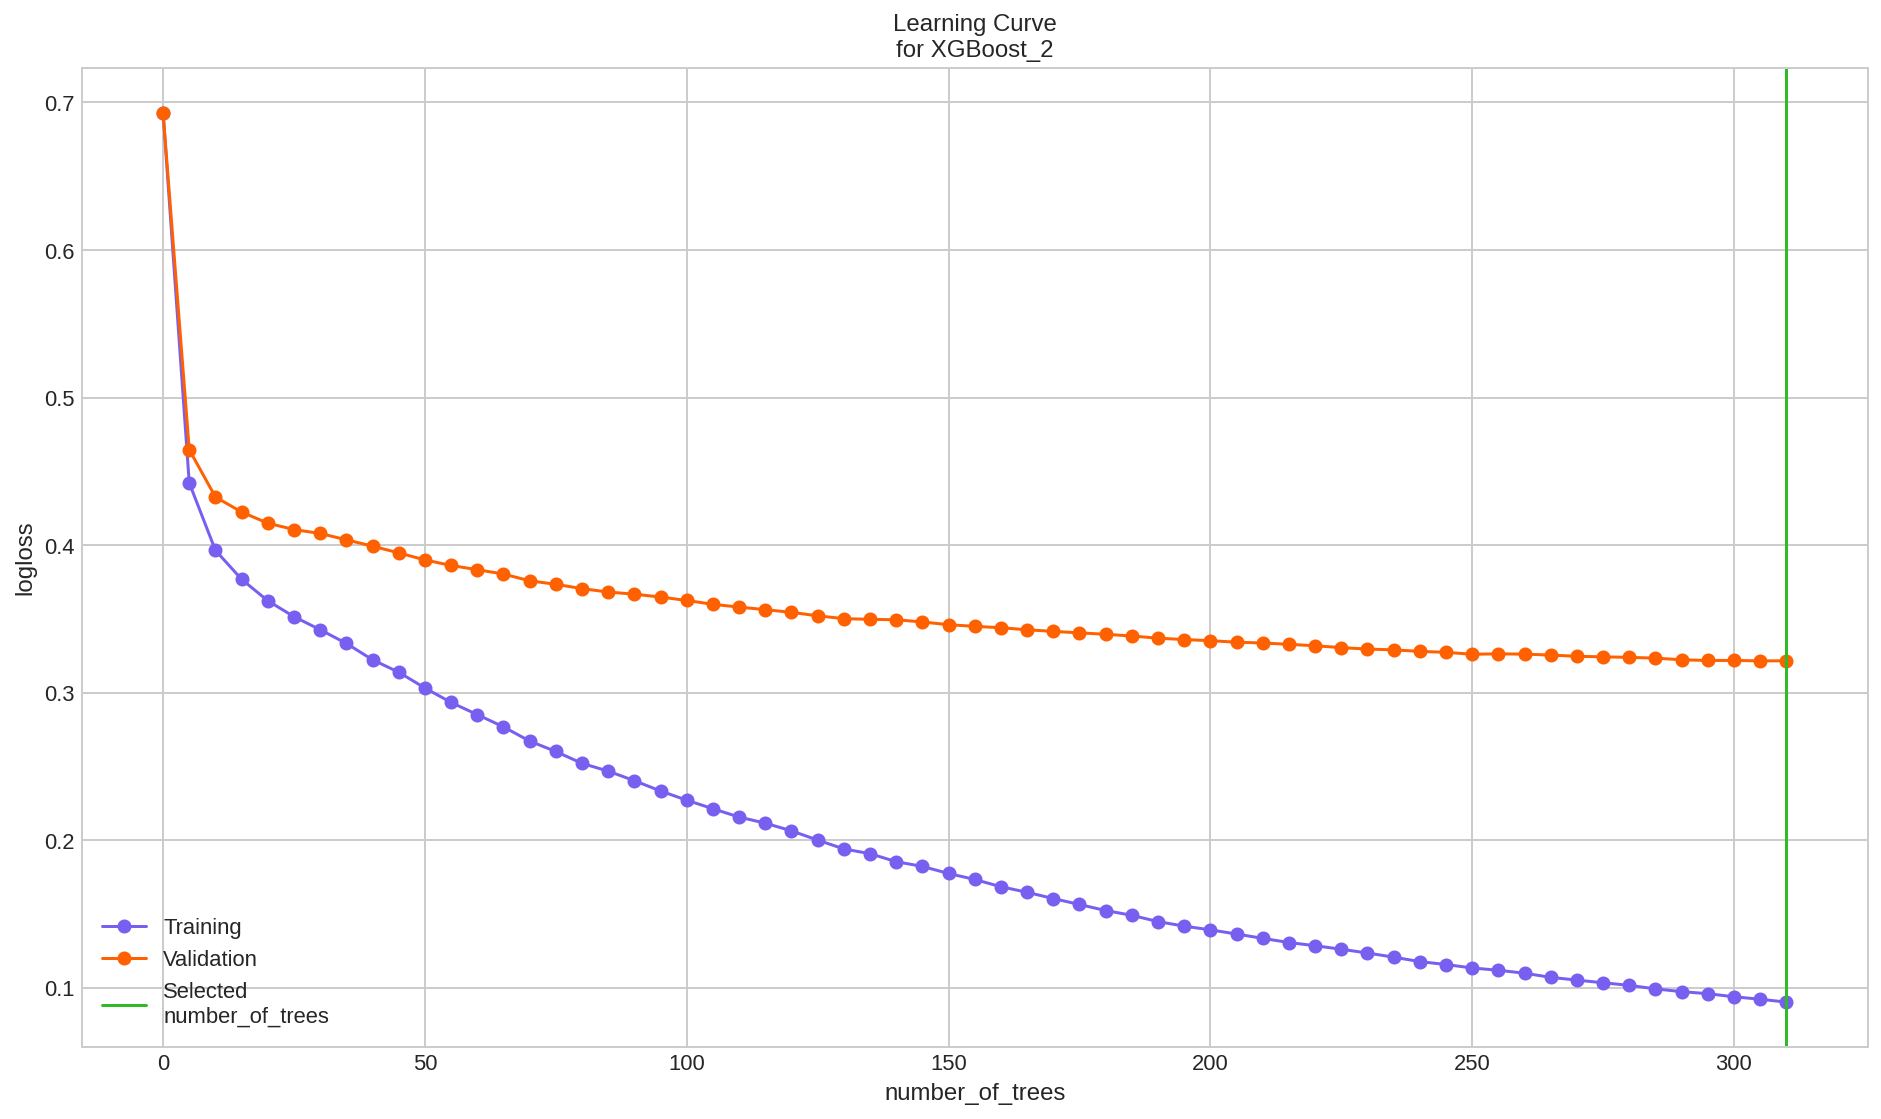

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

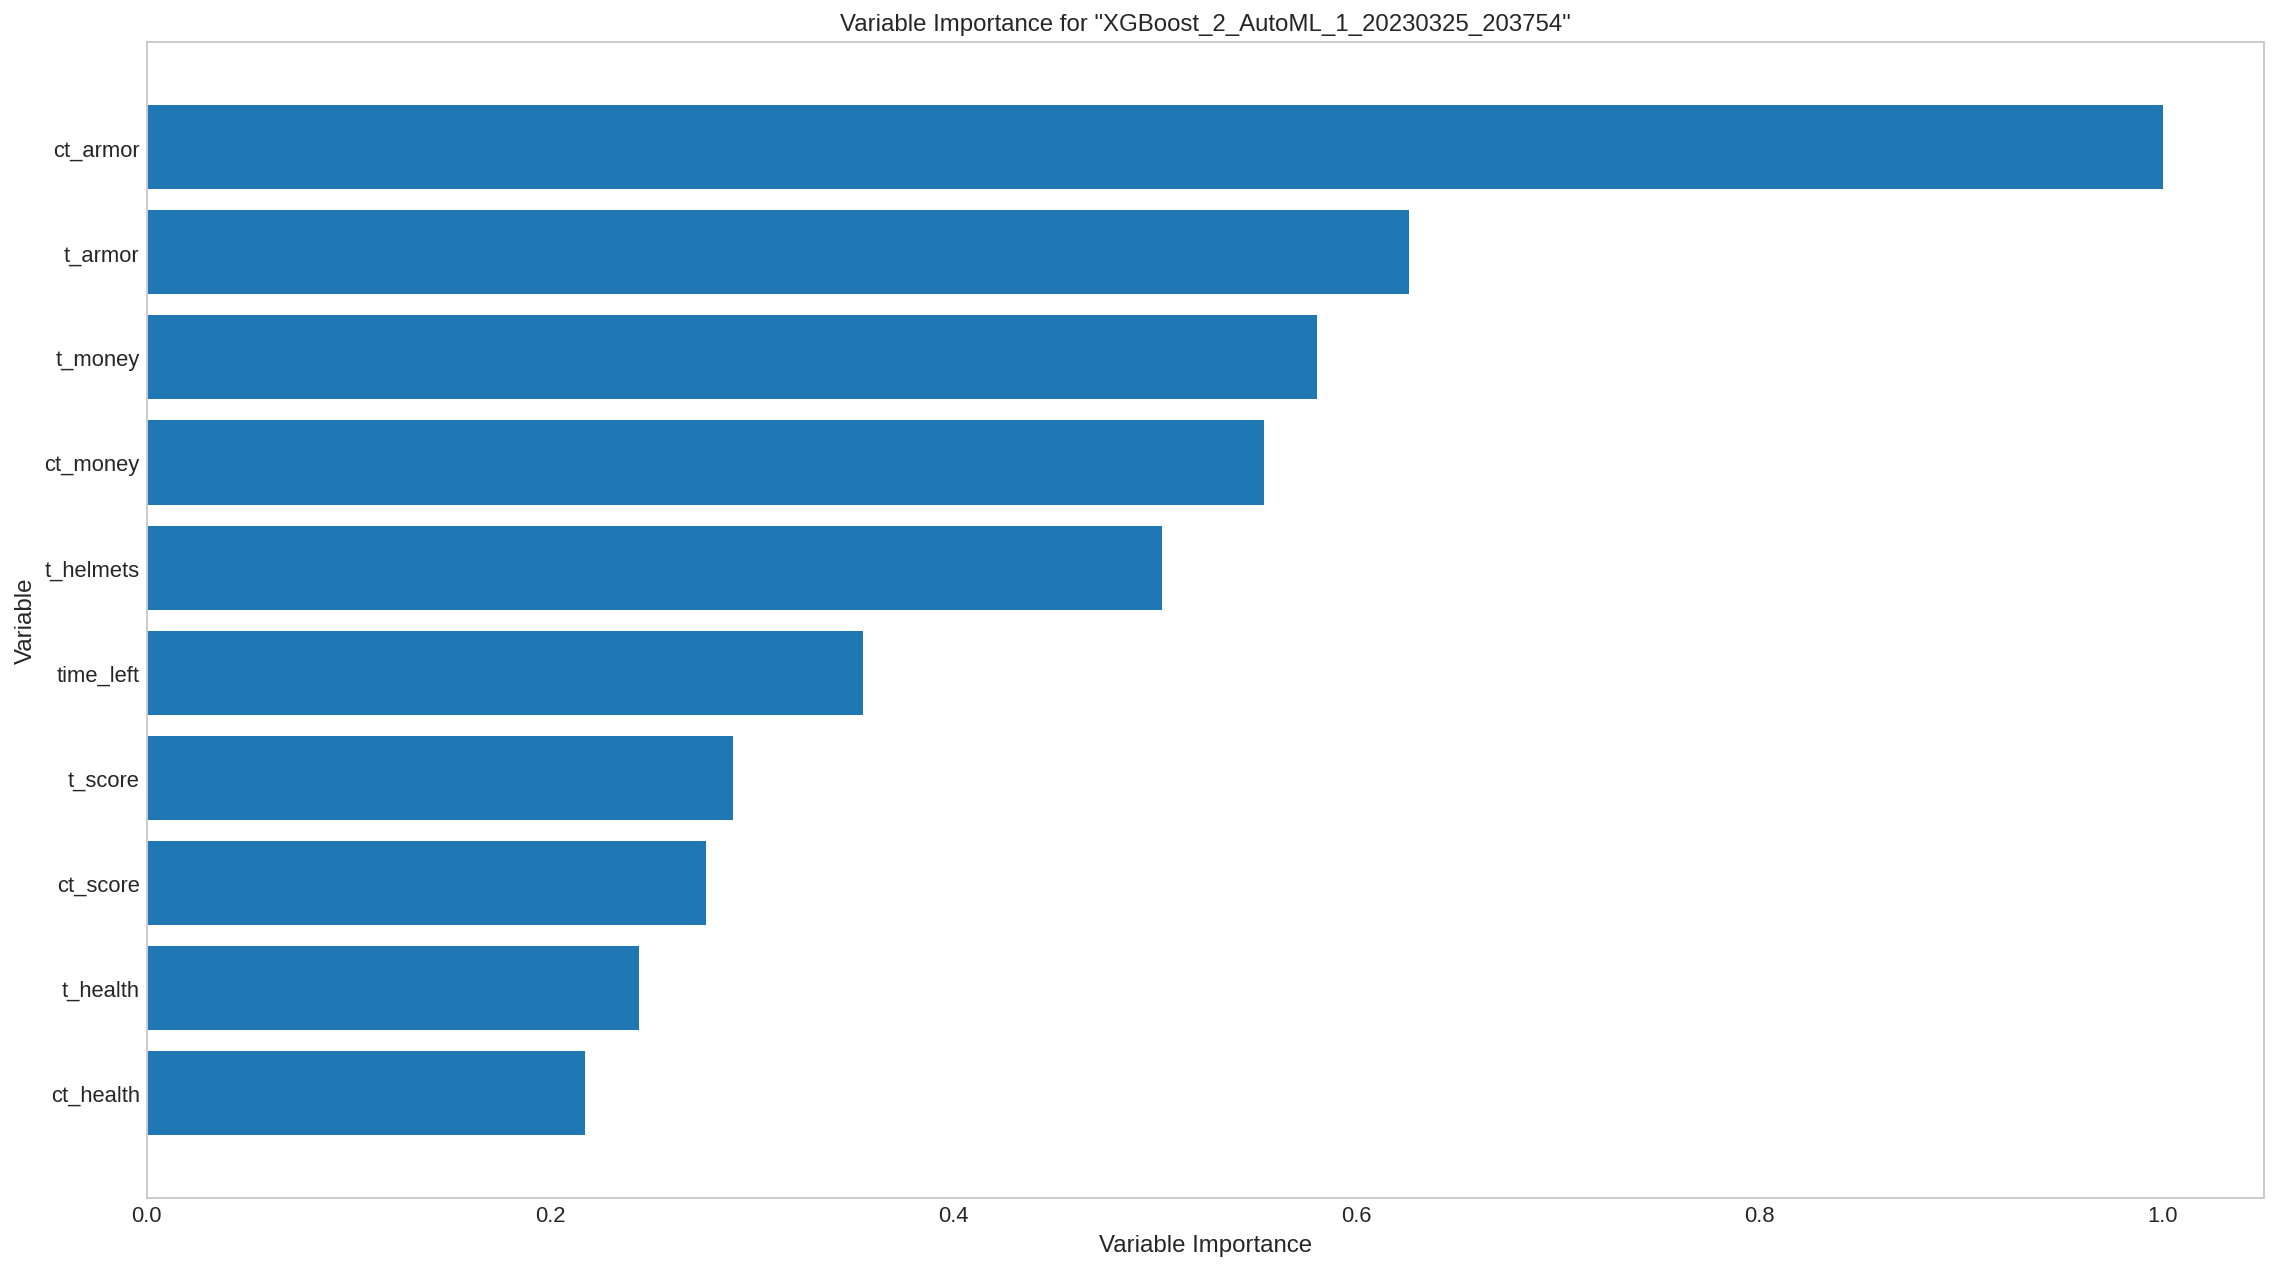

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

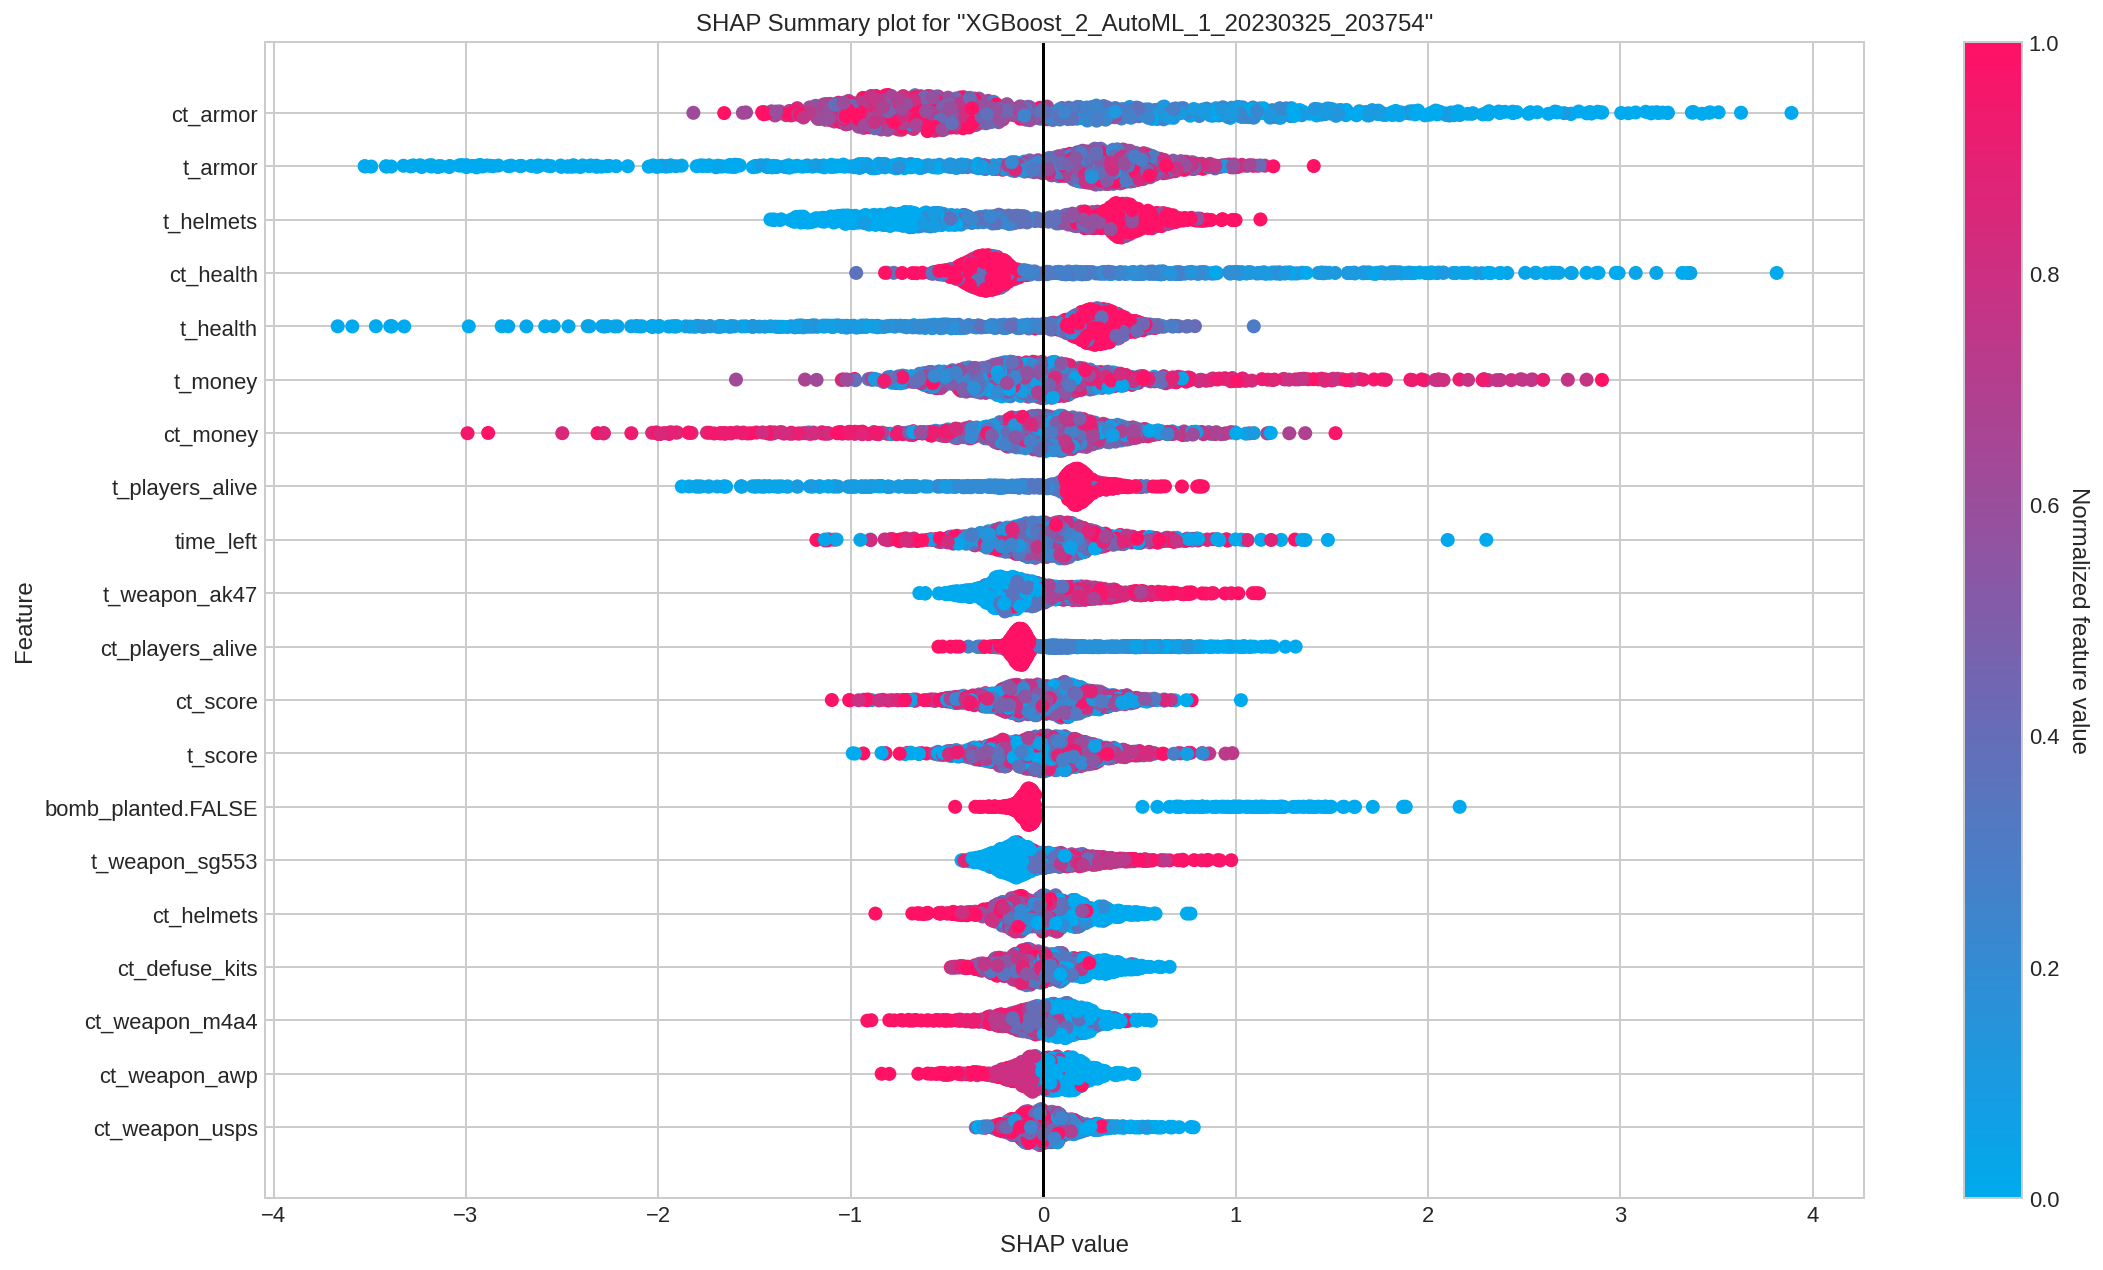

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

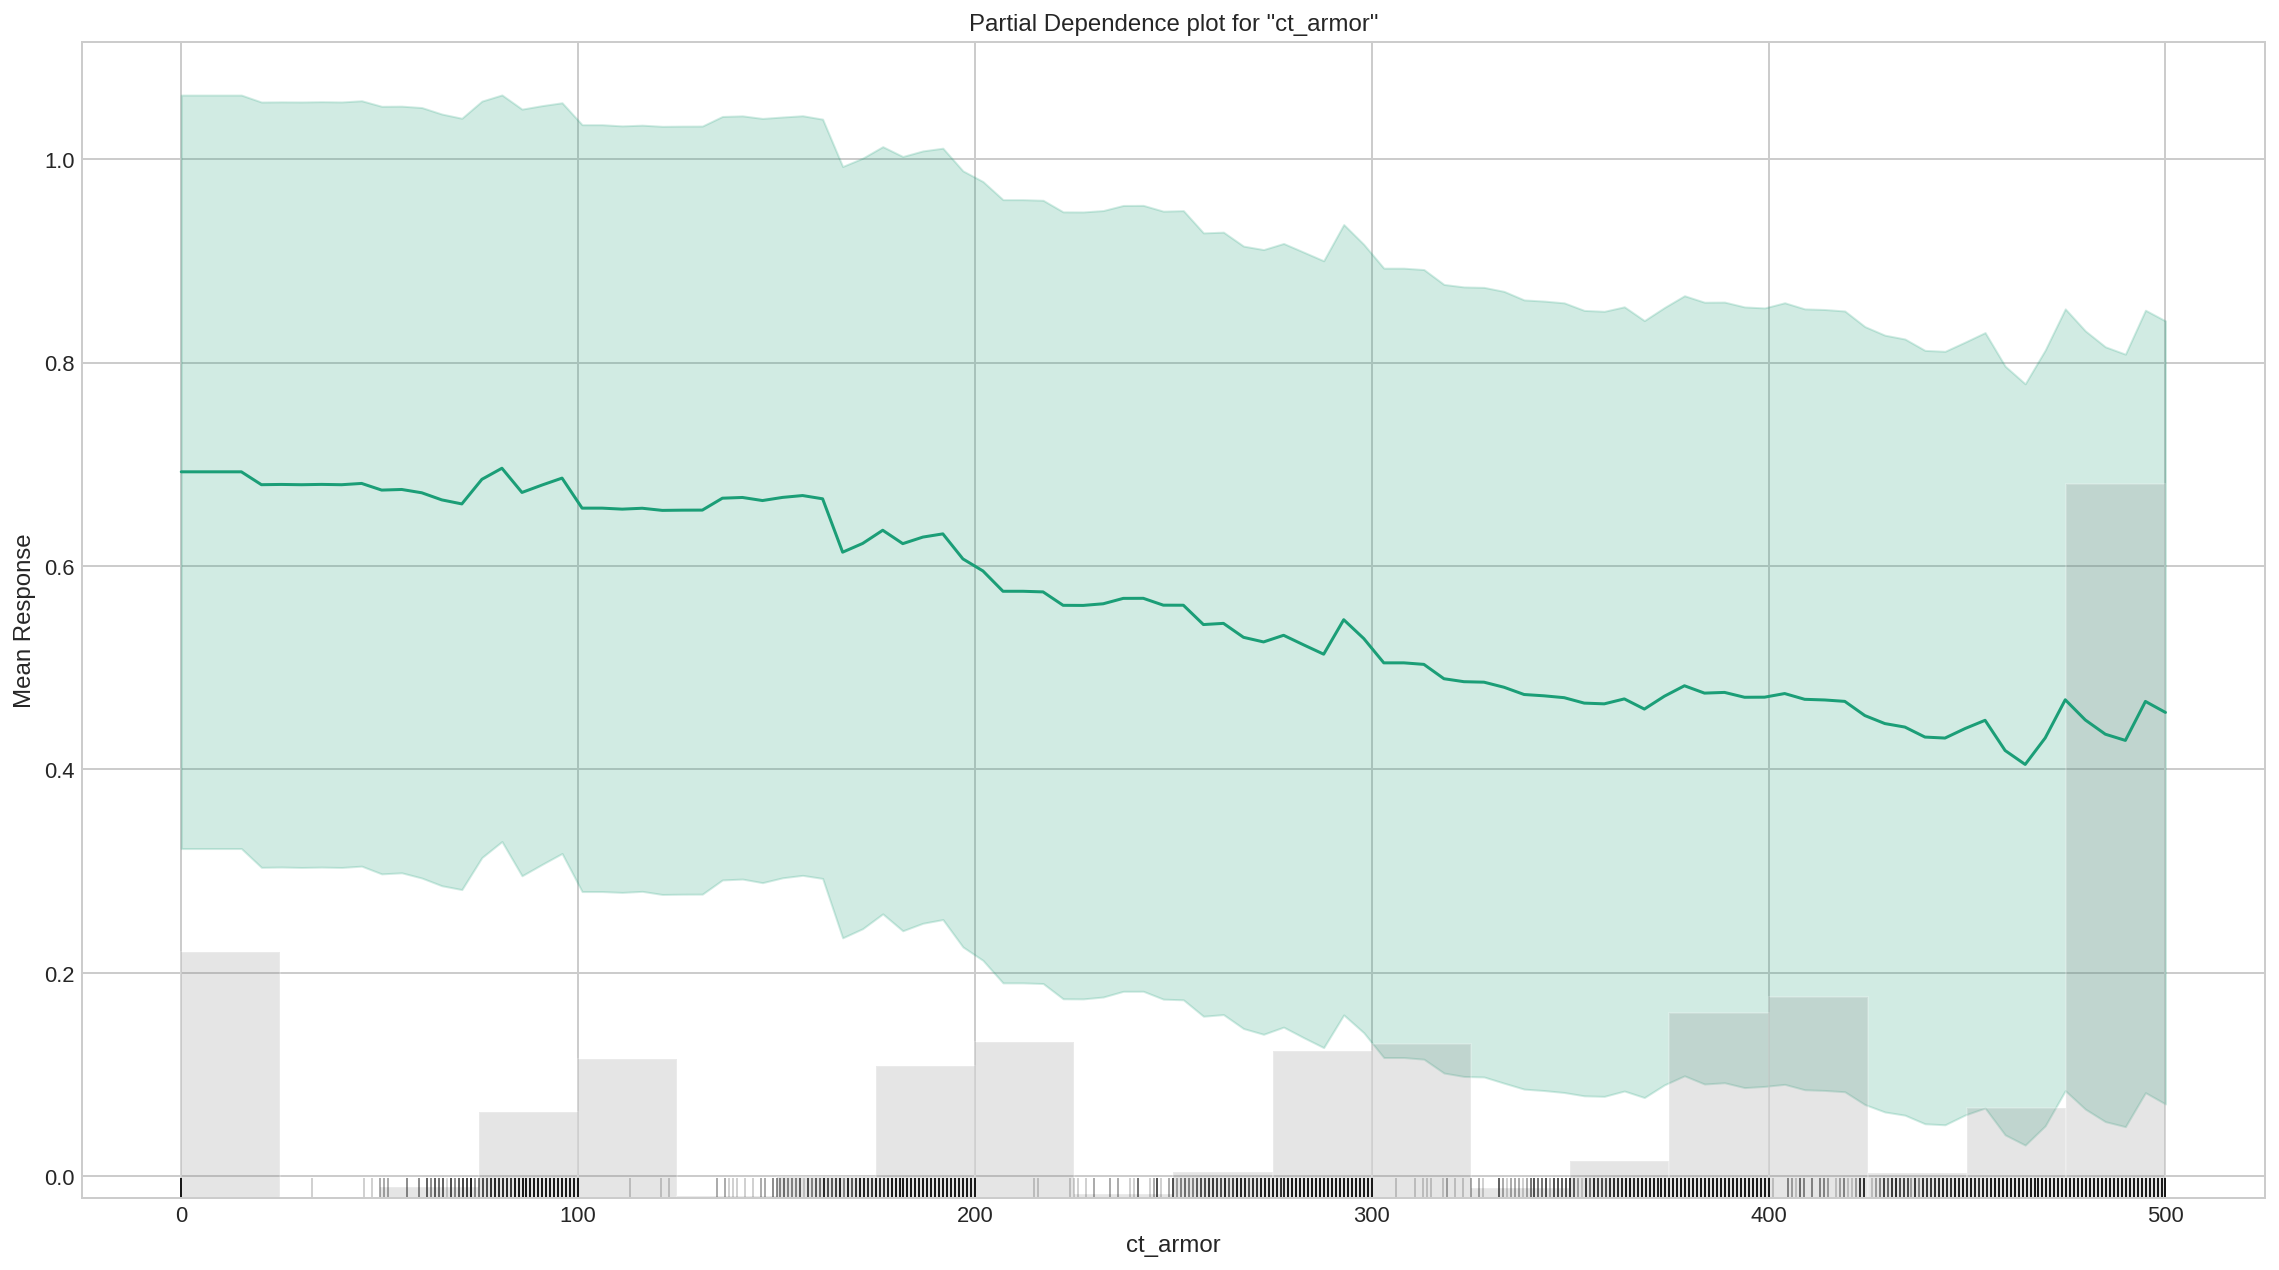

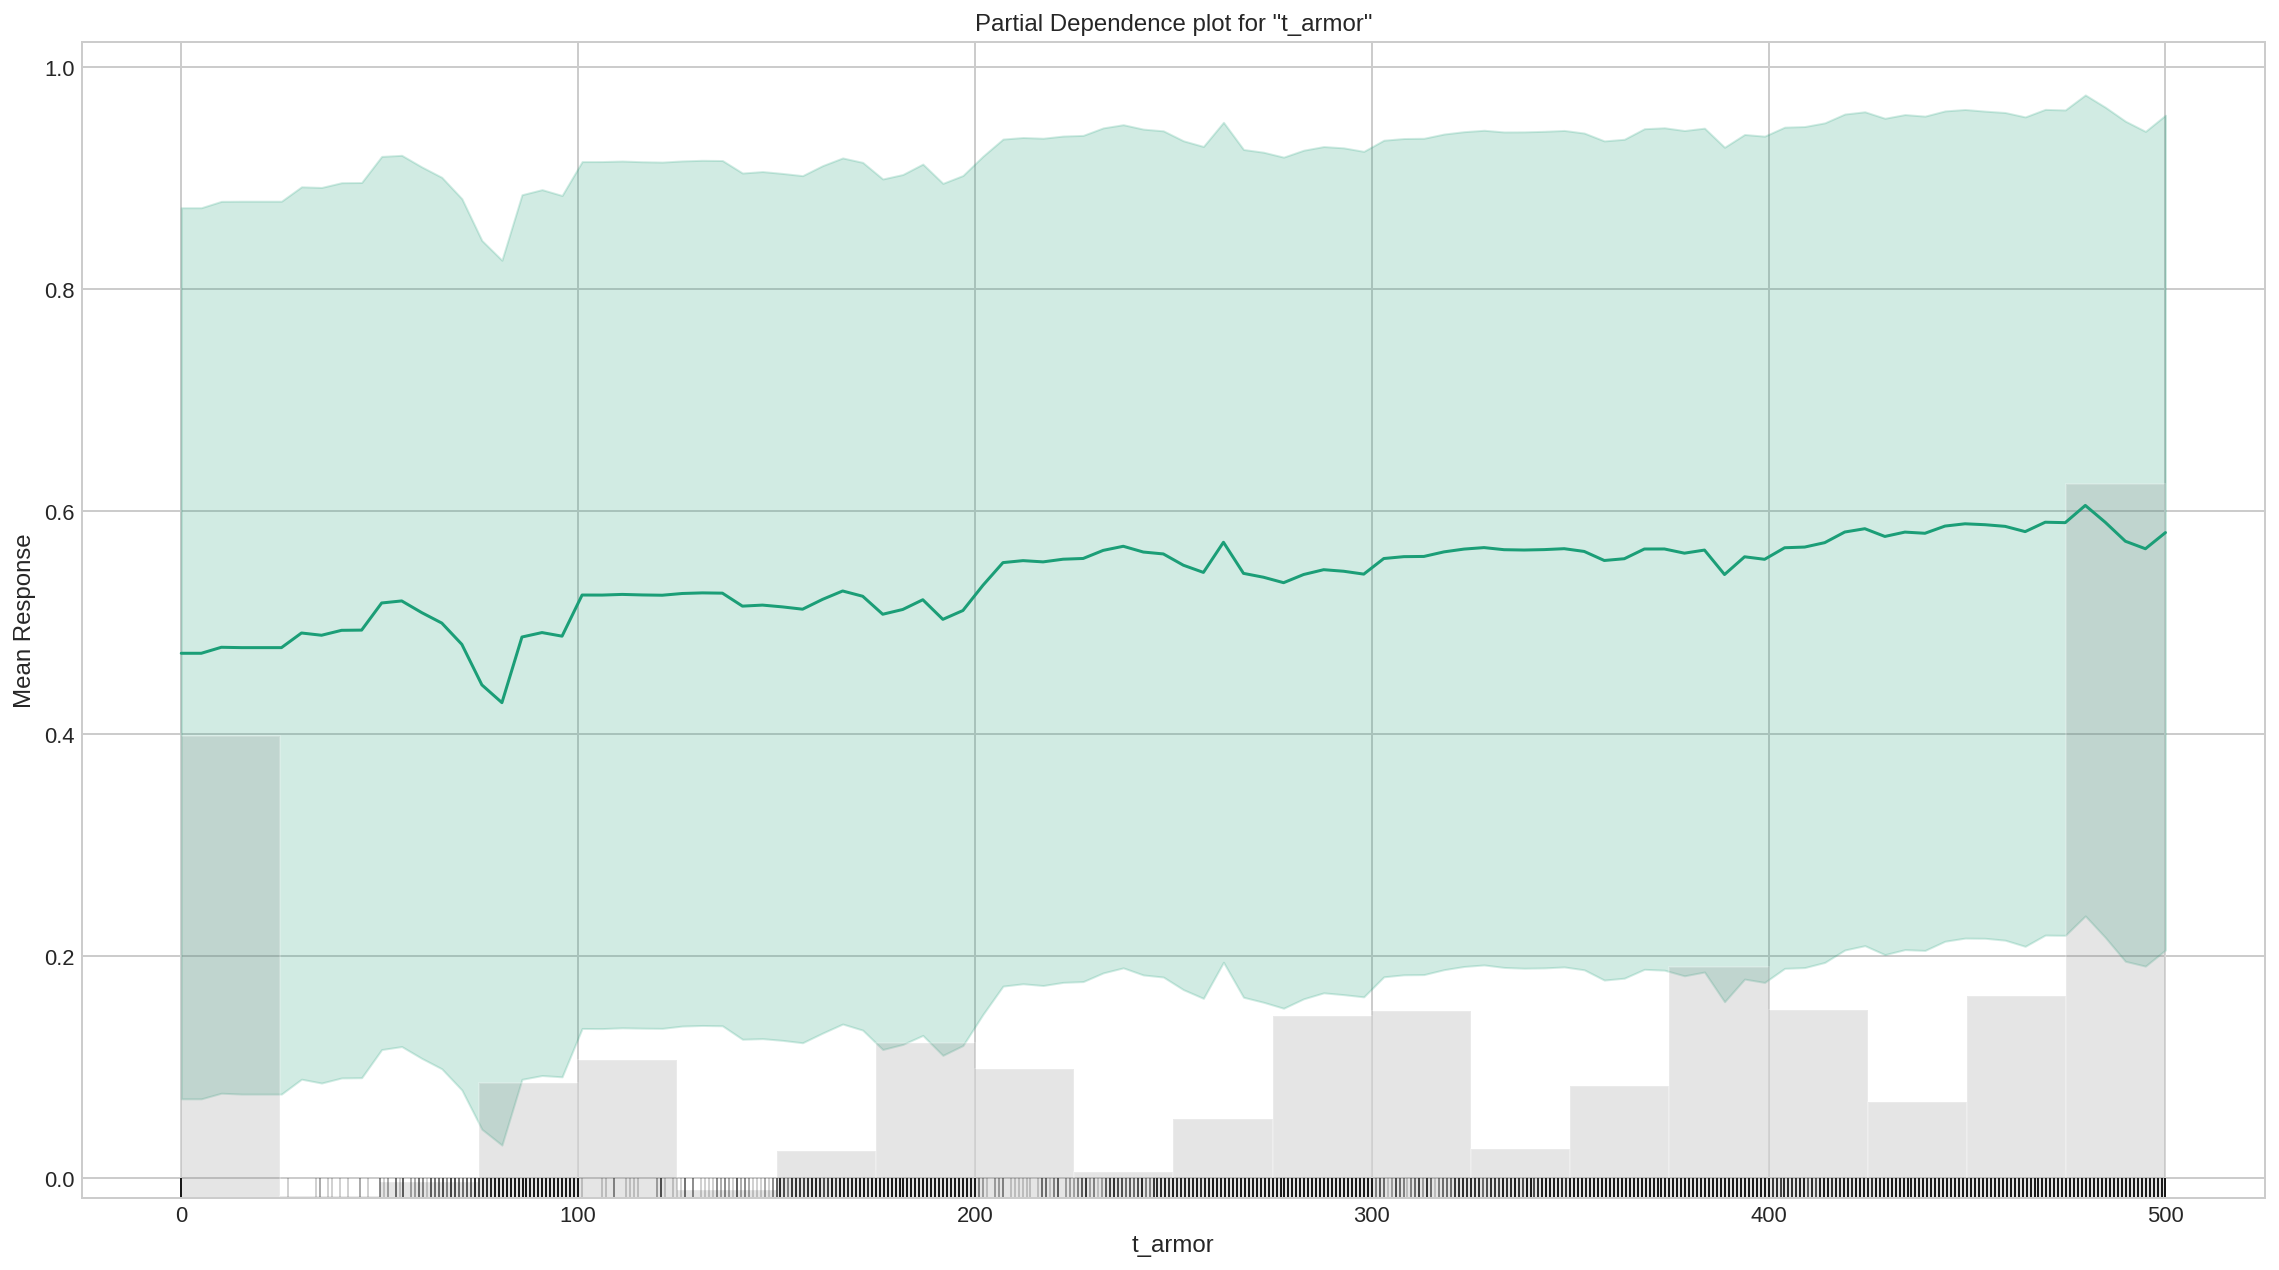

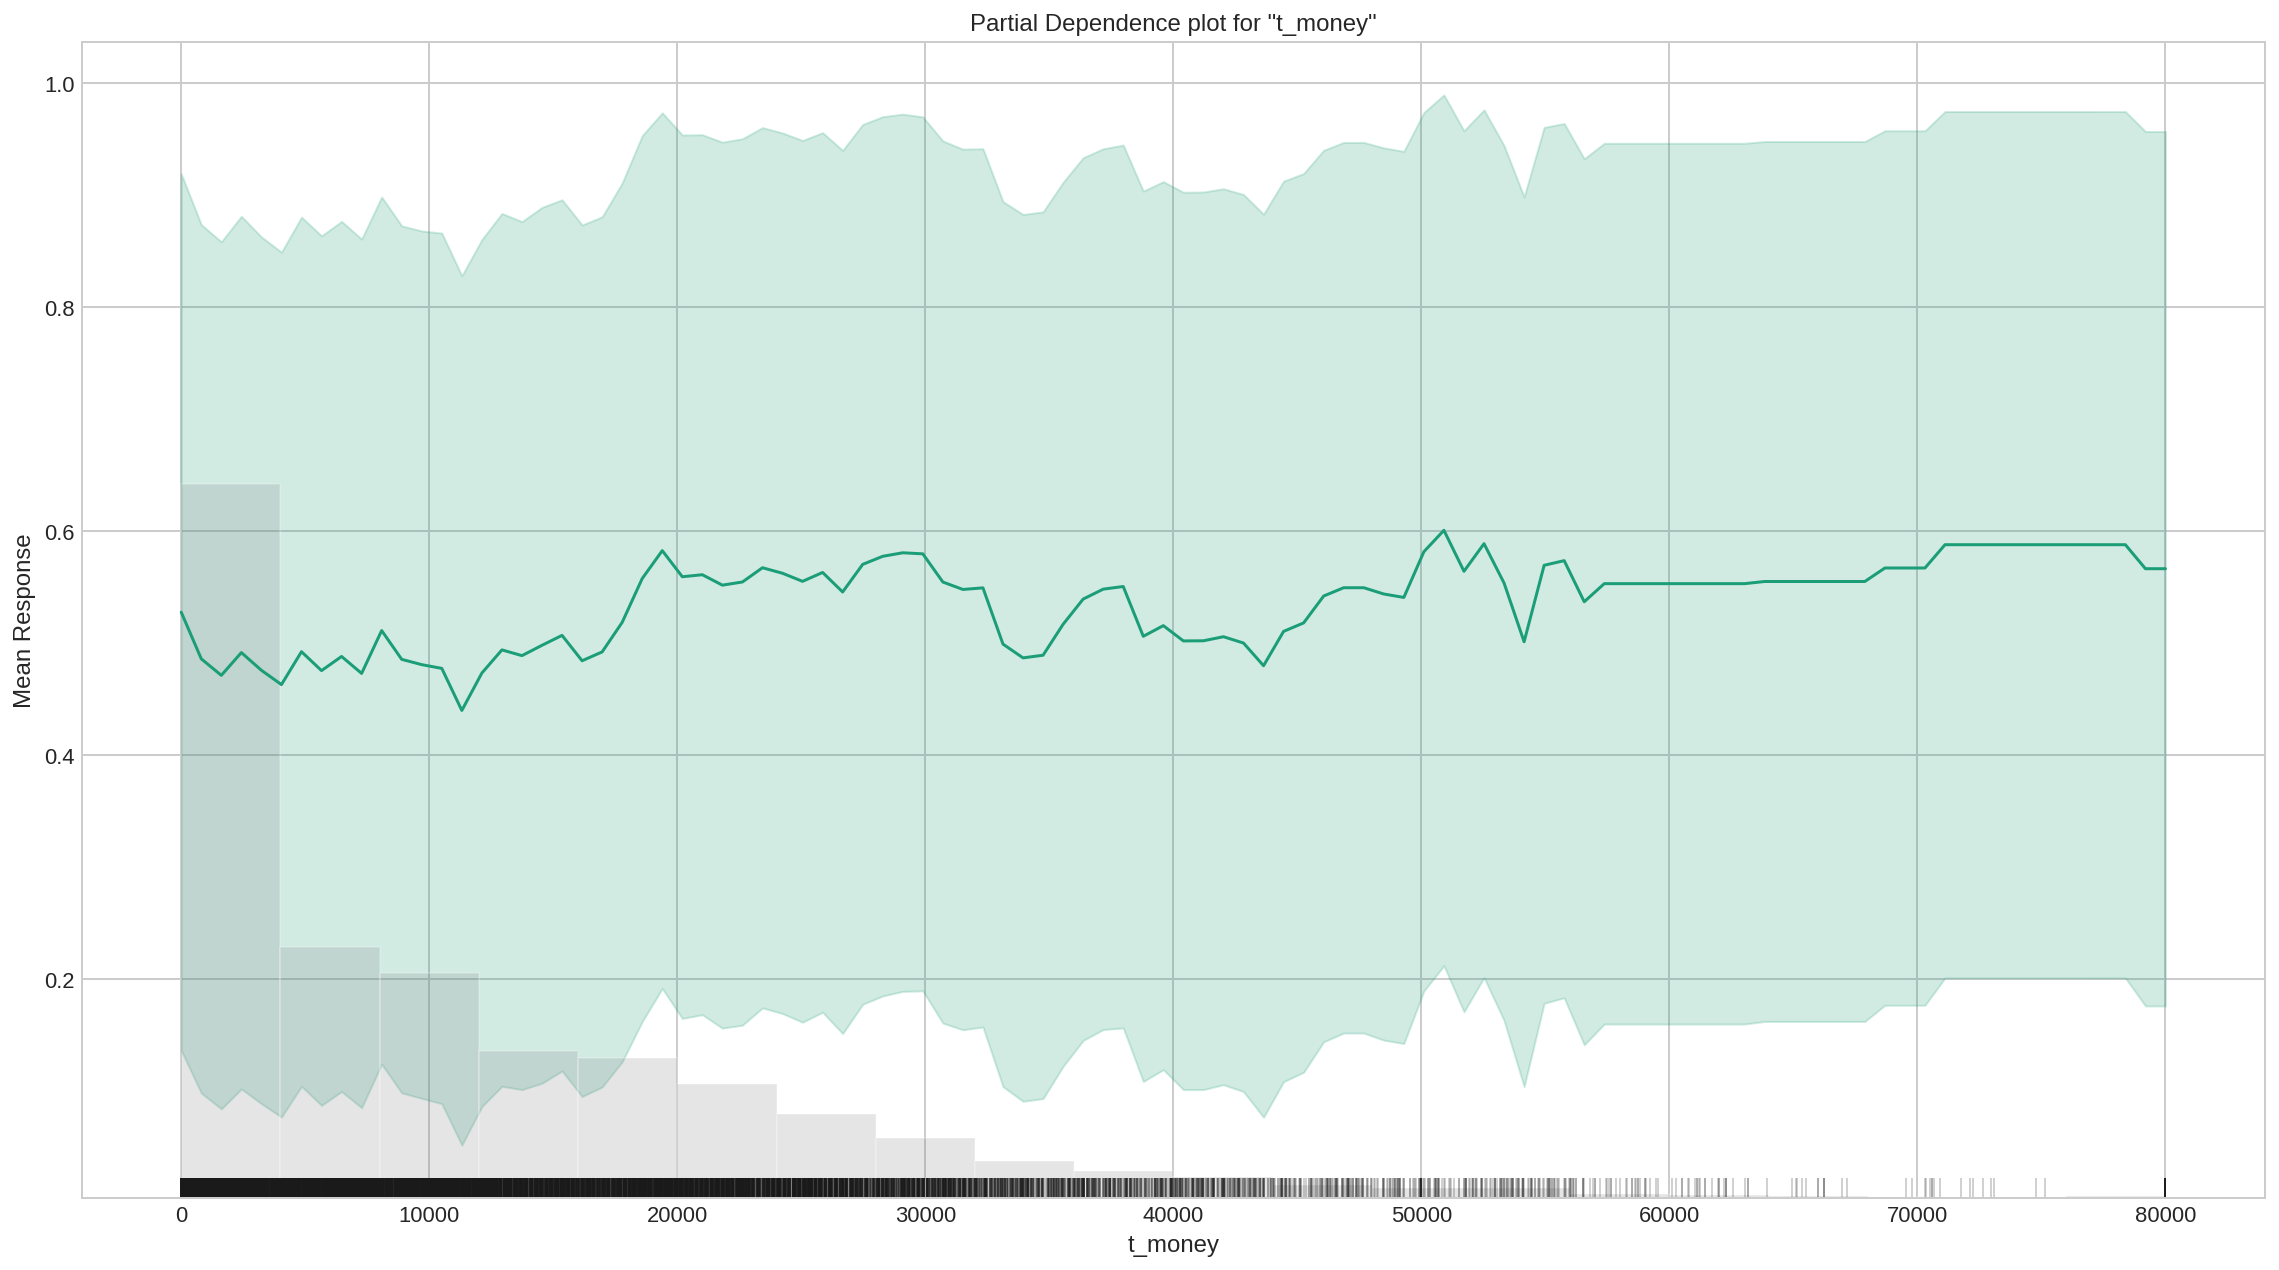

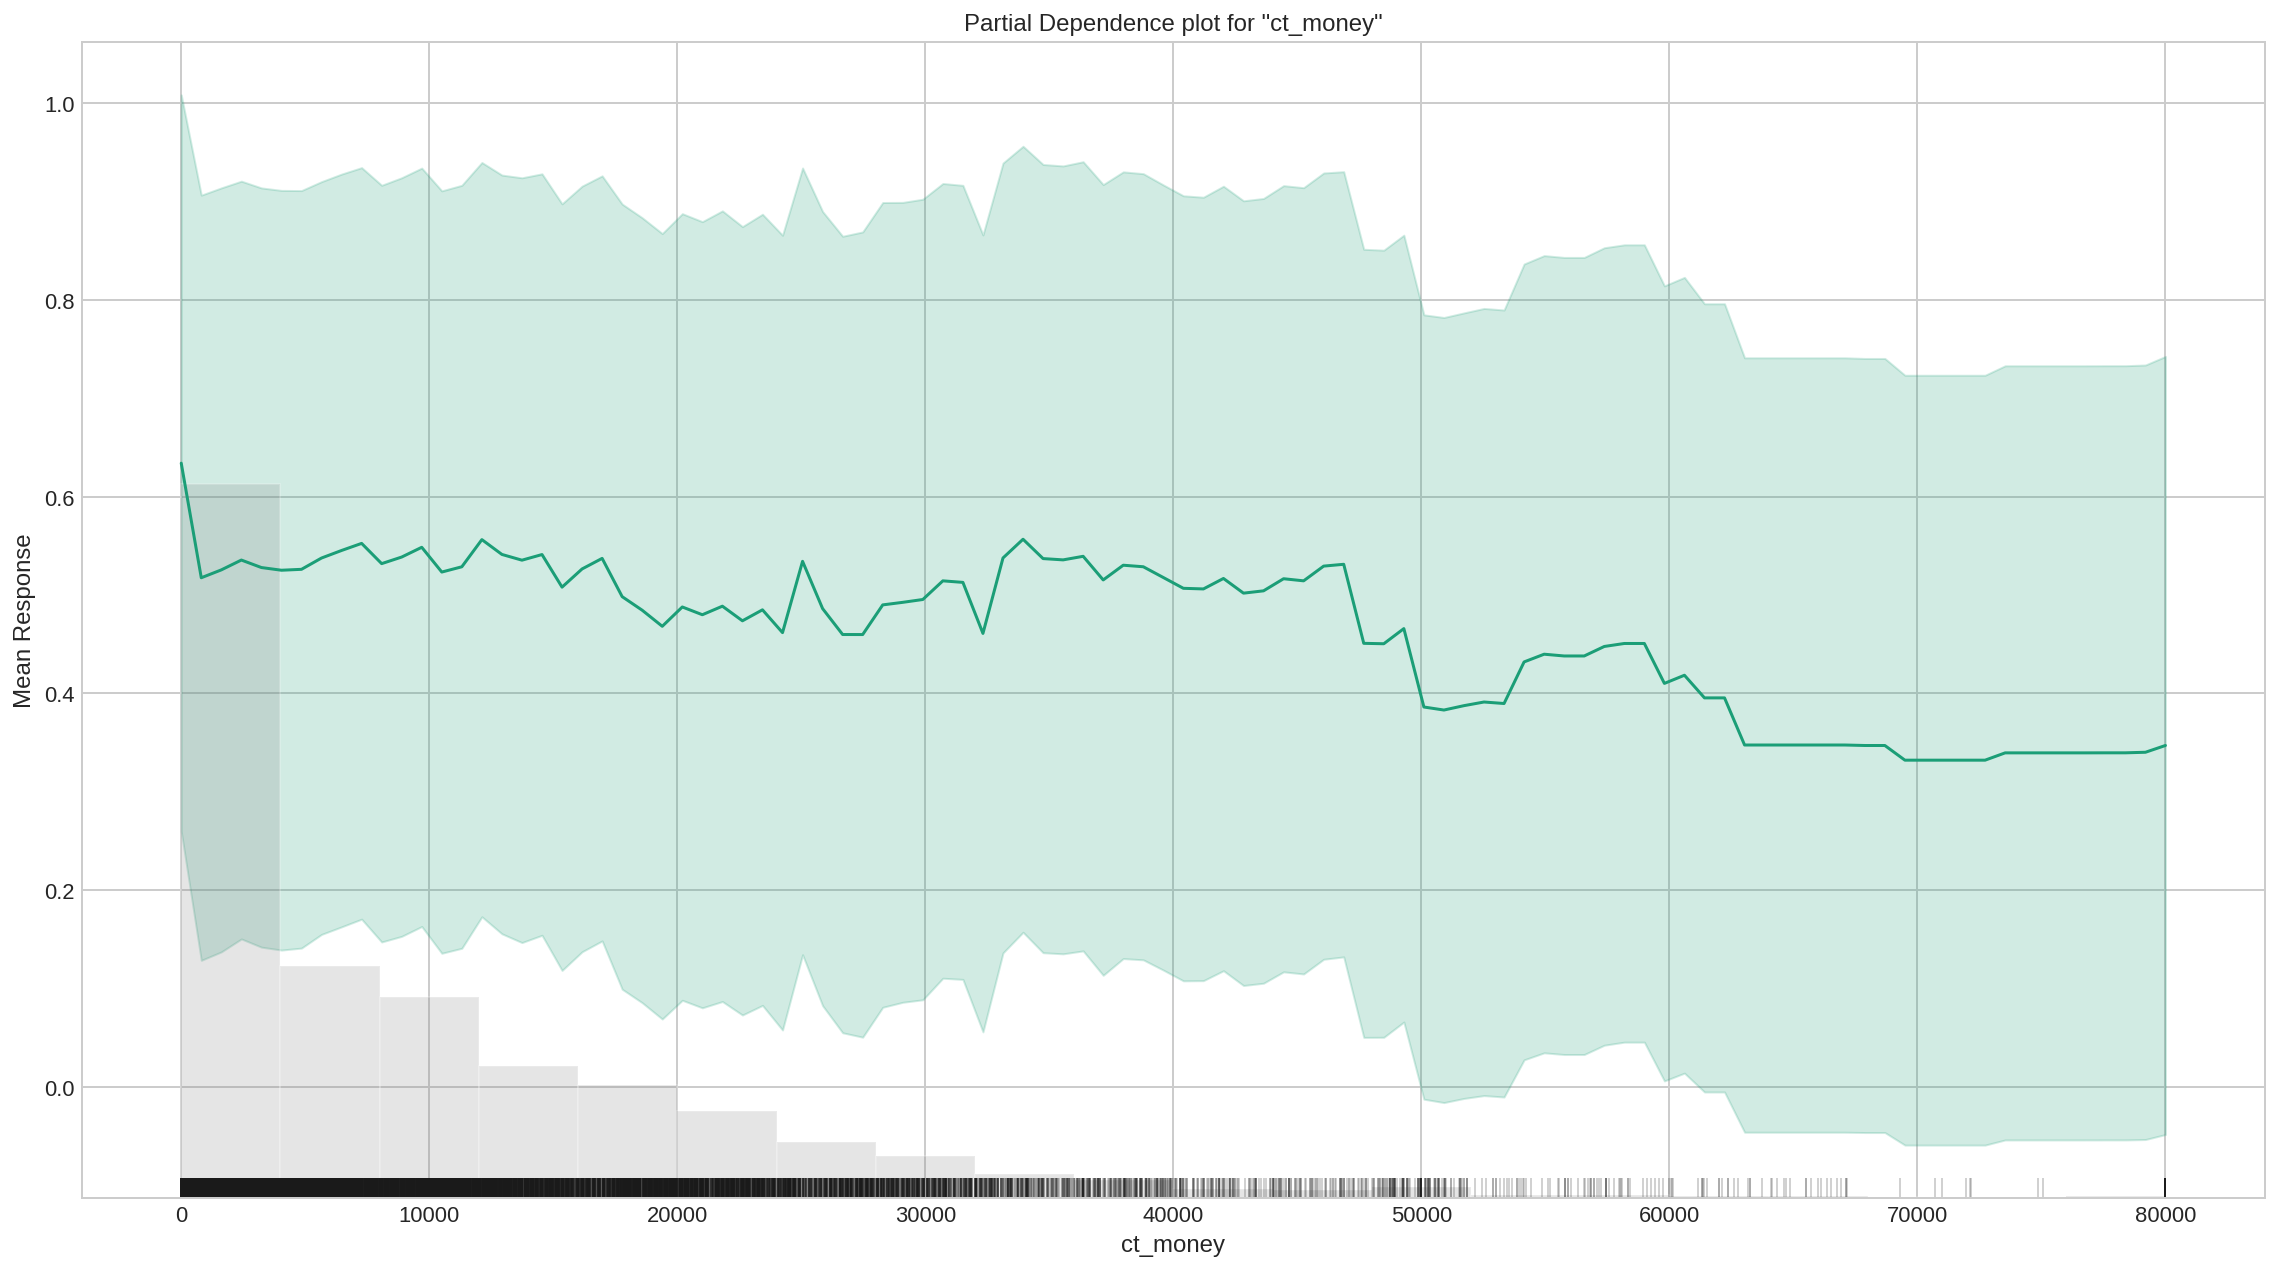

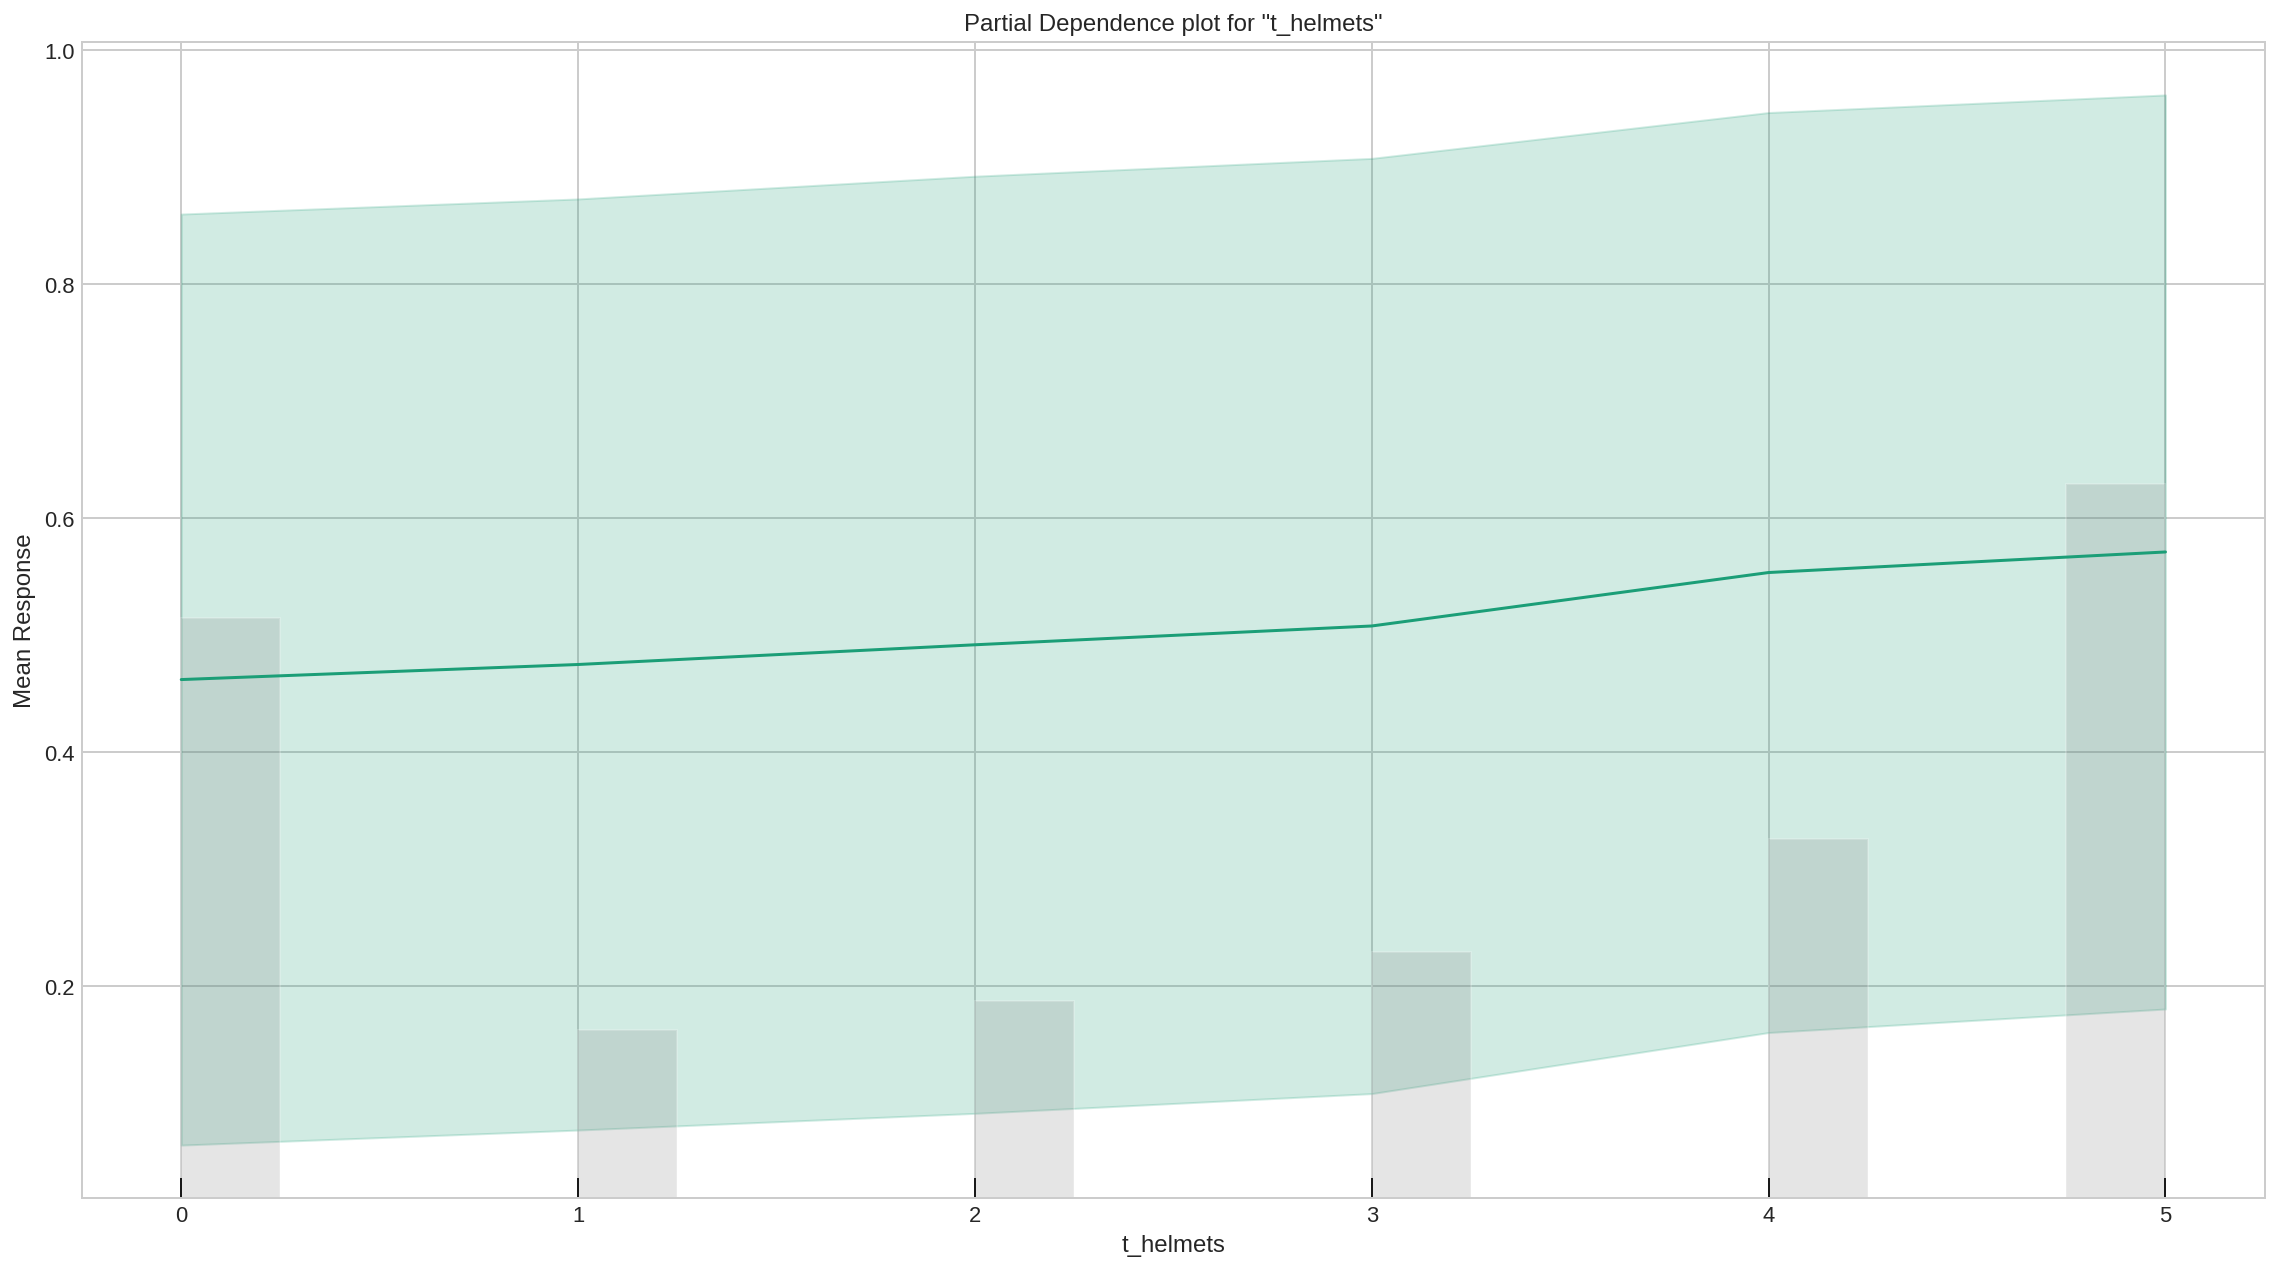

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_2_AutoML_1_20230325_203754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4387456799546878
       CT    T     Error    Rate
-----  ----  ----  -------  ----------------
CT     7432  1489  0.1669   (1489.0/8921.0)
T      1022  8208  0.1107   (1022.0/9230.0)
Total  8454  9697  0.1383   (2511.0/18151.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [59]:
aml.leader.explain(df_test)

##References:

https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

https://www.kaggle.com/code/cristianlazoquispe/automl-h2o-shap-explanation/notebook

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

##LICENSE

MIT License

Copyright (c) 2023 Sri Krishna Karumanchi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.